In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import numpy as np
warnings.filterwarnings('ignore')

In [8]:
#Read the csv
df = pd.read_csv('loan.csv',encoding = "ISO-8859-1", low_memory=False)

In [9]:
#Shape of the dataframe
df.shape

(39717, 111)

In [10]:
#colmns
df.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'num_tl_90g_dpd_24m', 'num_tl_op_past_12m', 'pct_tl_nvr_dlq',
       'percent_bc_gt_75', 'pub_rec_bankruptcies', 'tax_liens',
       'tot_hi_cred_lim', 'total_bal_ex_mort', 'total_bc_limit',
       'total_il_high_credit_limit'],
      dtype='object', length=111)

# Data Cleaning

In [11]:
missing_columns = df.isnull().sum() / len(df.id)

In [12]:
#columns with 50% missing
missing_colums_50 = df.columns[(df.isnull().sum() / len(df.id)) > 0.5]

In [13]:
missing_colums_50

Index(['mths_since_last_delinq', 'mths_since_last_record', 'next_pymnt_d',
       'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'tot_coll_amt', 'tot_cur_bal',
       'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m',
       'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m',
       'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi',
       'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal',
       'bc_open_to_buy', 'bc_util', 'mo_sin_old_il_acct',
       'mo_sin_old_rev_tl_op', 'mo_sin_rcnt_rev_tl_op', 'mo_sin_rcnt_tl',
       'mort_acc', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq',
       'mths_since_recent_inq', 'mths_since_recent_revol_delinq',
       'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl',
       'num_bc_sats', 'num_bc_tl', 'num_il_tl', 'num_op_rev_tl',
       'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m',
       'num_t

In [14]:
#dropping columns with atleast 50% missing values
df = df.drop(missing_colums_50, axis=1)

In [15]:
df.shape

(39717, 54)

In [16]:
# Refinding the missing columns
missing_columns = df.isnull().sum() / len(df.id)

In [17]:
# All colummns with missing values
missing_columns[missing_columns > 0]

emp_title                     0.061913
emp_length                    0.027066
desc                          0.325855
title                         0.000277
revol_util                    0.001259
last_pymnt_d                  0.001788
last_credit_pull_d            0.000050
collections_12_mths_ex_med    0.001410
chargeoff_within_12_mths      0.001410
pub_rec_bankruptcies          0.017549
tax_liens                     0.000982
dtype: float64

In [18]:
#dropping desc which has more than 30% missing
df = df.drop('desc',axis=1)

In [19]:
df.shape

(39717, 53)

In [20]:
#Removing rows with null emp_title
df = df.drop('emp_title',axis=1)
df.shape

(39717, 52)

In [21]:
df['emp_length'].describe()

count         38642
unique           11
top       10+ years
freq           8879
Name: emp_length, dtype: object

In [22]:
df['emp_length'].value_counts()

emp_length
10+ years    8879
< 1 year     4583
2 years      4388
3 years      4095
4 years      3436
5 years      3282
1 year       3240
6 years      2229
7 years      1773
8 years      1479
9 years      1258
Name: count, dtype: int64

In [23]:
emp_length_conversions = {
    '< 1 year' : 0,
    '1 year' : 1,
    '2 years' : 2,
    '3 years' : 3,
    '4 years' : 4,
    '5 years' : 5,
    '6 years' : 6,
    '7 years' : 7,
    '8 years' : 8,
    '9 years' : 9,
    '10+ years' : 10
}

In [24]:
#converting the emp_length to numeric values for analysis
df = df.replace({"emp_length": emp_length_conversions })

In [25]:
df['emp_length'].value_counts()

emp_length
10.0    8879
0.0     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
Name: count, dtype: int64

In [26]:
df['emp_length'].describe()

count    38642.000000
mean         4.973449
std          3.562580
min          0.000000
25%          2.000000
50%          4.000000
75%          9.000000
max         10.000000
Name: emp_length, dtype: float64

In [27]:
#filling missing values with median
df['emp_length'] = df['emp_length'].fillna('4')

In [28]:
df['emp_length'].describe()

count     39717.0
unique       12.0
top          10.0
freq       8879.0
Name: emp_length, dtype: float64

In [29]:
#confirming no missing values in emp_length
df['emp_length'].isnull().sum()

0

In [30]:
df['emp_length'].value_counts()

emp_length
10.0    8879
0.0     4583
2.0     4388
3.0     4095
4.0     3436
5.0     3282
1.0     3240
6.0     2229
7.0     1773
8.0     1479
9.0     1258
4       1075
Name: count, dtype: int64

In [31]:
#Finding remaining missing columns
missing_columns = df.isnull().sum() / len(df.id)
missing_columns = missing_columns[missing_columns > 0]
missing_columns

title                         0.000277
revol_util                    0.001259
last_pymnt_d                  0.001788
last_credit_pull_d            0.000050
collections_12_mths_ex_med    0.001410
chargeoff_within_12_mths      0.001410
pub_rec_bankruptcies          0.017549
tax_liens                     0.000982
dtype: float64

In [32]:
#Analysing pub_rec_bankruptcies which is the next highest missing columns
df['pub_rec_bankruptcies'].value_counts()
#Highest received bankruptcies are 0 hence replacing null with 0
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].fillna(0)
df['pub_rec_bankruptcies'] = df['pub_rec_bankruptcies'].astype(int)

In [33]:
#Analysing the missing values in last_pymnt_d
df['last_pymnt_d'].value_counts()
#removing the rows with null values in last_payment_date as these are mostly invalid rows
df = df[~df['last_pymnt_d'].isnull()]
#Converting the 
df['last_pymnt_d'] = pd.to_datetime(df['last_pymnt_d'],format='%b-%y')

In [34]:
#Analysing the missing values in collections_12_mths_ex_med
df['collections_12_mths_ex_med'].value_counts()
#All values are either 0 or null dropping this column
df = df.drop('collections_12_mths_ex_med',axis=1)

In [35]:
#Analysing the missing values in chargeoff_within_12_mths
df['chargeoff_within_12_mths'].value_counts()
#All values are either 0 or null dropping this column
df = df.drop('chargeoff_within_12_mths',axis=1)

In [36]:
#Analysing the missing values in revol_util
df['revol_util'].value_counts()
#Since most are 0% changing the null value to 0%
df['revol_util'] = df['revol_util'].fillna('0%')
#Changing the number to float after removing %
df['revol_util'] = df['revol_util'].str[:-1].astype(float)

In [37]:
#Analysing the missing values in tax_lien
df['tax_liens'].value_counts()
#All values are either 0 or null dropping this column
df = df.drop('tax_liens',axis=1)

In [38]:
#Analysing the missing values in title
df['title'].value_counts()
#Removing rows with null title
df = df[~df['title'].isnull()]

In [39]:
one_unique_columns = df.columns[df.nunique() == 1]

In [40]:
one_unique_columns

Index(['pymnt_plan', 'initial_list_status', 'policy_code', 'application_type',
       'acc_now_delinq', 'delinq_amnt'],
      dtype='object')

In [41]:
#removing all columns with all unique values as that wont be usefil in analysis
df = df.drop(one_unique_columns, axis=1)

In [42]:
df.shape

(39635, 43)

In [43]:
df.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    12
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2597
dti                         2868
recoveries                  3987
annual_inc

In [44]:
#df['term'].value_counts()
df['term'] = df['term'].apply(lambda x: x[:3])
df['term']

0         36
1         60
2         36
3         36
4         60
        ... 
39712     36
39713     36
39714     36
39715     36
39716     36
Name: term, Length: 39635, dtype: object

In [45]:
categorical_columns = df.columns[df.nunique() < 20]

In [46]:
#finding all categorical columns
categorical_columns

Index(['term', 'grade', 'emp_length', 'home_ownership', 'verification_status',
       'loan_status', 'purpose', 'delinq_2yrs', 'inq_last_6mths', 'pub_rec',
       'pub_rec_bankruptcies'],
      dtype='object')

In [47]:
#Fixing the quantitative variables
#Fixing interest rates
df['int_rate'] = df['int_rate'].str[:-1].astype(float)


In [48]:
#Fixing last_credit_pull_d converting to datetime
df['last_credit_pull_d'] = pd.to_datetime(df['last_credit_pull_d'],format='%b-%y')
df['last_credit_pull_d']

0       2016-05-01
1       2013-09-01
2       2016-05-01
3       2016-04-01
4       2016-05-01
           ...    
39712   2010-06-01
39713   2010-07-01
39714   2007-06-01
39715   2007-06-01
39716   2010-06-01
Name: last_credit_pull_d, Length: 39635, dtype: datetime64[ns]

In [49]:
#Removing memberid,id,url columns whiah has all unique values won't contribute to analysis
df = df.drop(['member_id','url','id'],axis=1)

In [50]:
df['loan_status']

0         Fully Paid
1        Charged Off
2         Fully Paid
3         Fully Paid
4            Current
            ...     
39712     Fully Paid
39713     Fully Paid
39714     Fully Paid
39715     Fully Paid
39716     Fully Paid
Name: loan_status, Length: 39635, dtype: object

In [51]:
df['home_ownership']

0            RENT
1            RENT
2            RENT
3            RENT
4            RENT
           ...   
39712    MORTGAGE
39713        RENT
39714    MORTGAGE
39715    MORTGAGE
39716         OWN
Name: home_ownership, Length: 39635, dtype: object

# Univariate Analysis

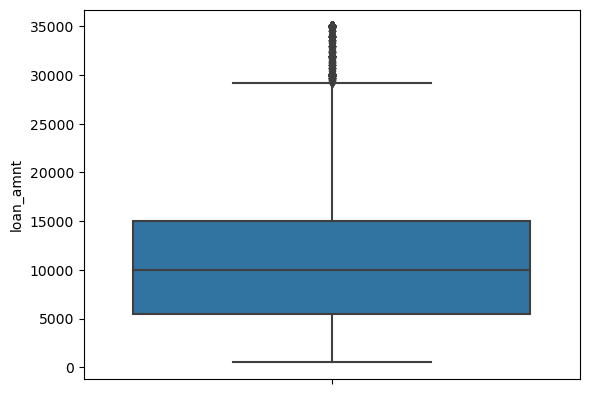

In [52]:
####Univariate Analysis start###
##Quantitative variables####
df['loan_amnt'].describe()
sns.boxplot(df, y = "loan_amnt")
plt.show()

#Median loan amount is around 10K , outliers lie in the range of 30k to 35K


In [53]:
#Find percentage outliers in loan_amount
df_loan_outlier = df[df['loan_amnt'] > 30000]

len(df_loan_outlier)/len(df) * 100

# 2% outliers in the loan disbursed

2.086539674530087

In [54]:
df['funded_amnt'].describe()
#funded amount distribution is similar to loan amount

count    39635.000000
mean     10953.029519
std       7185.814618
min        500.000000
25%       5400.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

In [55]:
df['annual_inc'].describe()
##Too many outliers in annual income . Remove rows with annual income greater than 99% 
df['annual_inc'].quantile(.95)
##230K is the 99th percentile of annual income while the median is 10k.


142000.0

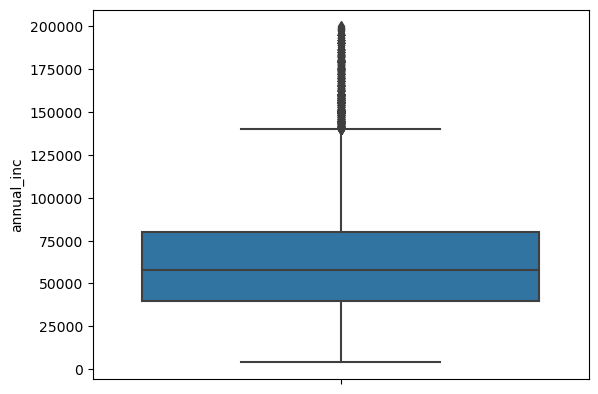

In [56]:
##Removing rows with annual income greater than 200K 
df = df[df['annual_inc'] < 200000]
df['annual_inc'].describe()
sns.boxplot(df, y = 'annual_inc')
plt.show()

##After removal of very income salaries the box plot of annual income 
##Median range is 6k
##Salary of around 150k is at the higher ranges .. greater than 150K are outliers

In [57]:
def condition(x):
    if x<40000:
        return "Very Low"
    elif x<=58000:
        return "Low"
    elif x<=80000:
        return "Medium"
    elif x<=130000:
        return "High"
    else:
        return "Very High"
 

In [58]:
##Categorizing the annual income as very low (<25%) low(25-50) medium(50-75) high(75-95) very high(>95)

df['annual_inc_cat'] = df['annual_inc'].apply(condition)


In [59]:
##Analysing installment
df['total_pymnt'].describe()

count    38927.000000
mean     12003.941123
std       8872.339565
min         33.730000
25%       5560.615771
50%       9797.777982
75%      16347.046130
max      58563.679930
Name: total_pymnt, dtype: float64

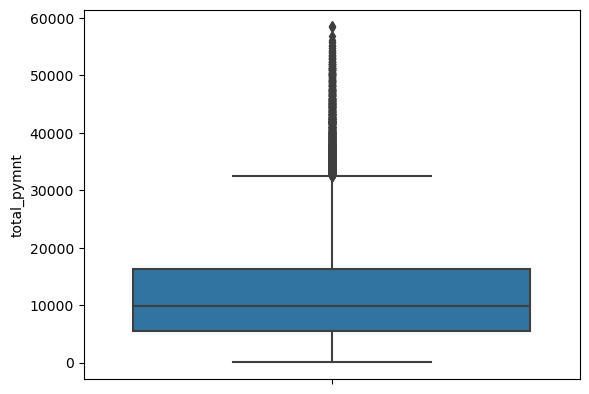

In [60]:

sns.boxplot(df, y='total_pymnt')
plt.show()

In [61]:
##Analysing installment
df['total_pymnt_inv'].describe()


count    38927.000000
mean     11425.679051
std       8772.639921
min          0.000000
25%       5091.185000
50%       9201.930000
75%      15575.770000
max      58563.680000
Name: total_pymnt_inv, dtype: float64

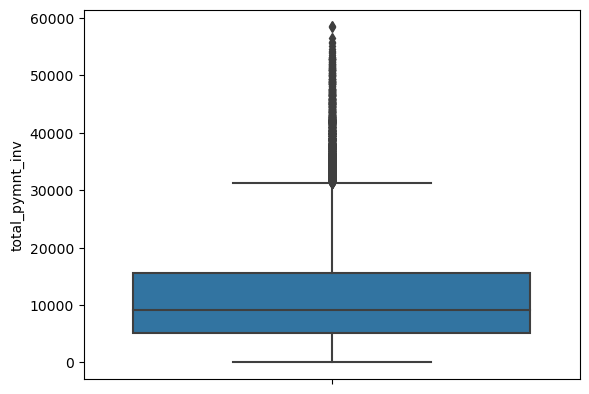

In [62]:
sns.boxplot(df, y = 'total_pymnt_inv')
plt.show()

#Both total_pymnt and total_pymnt_inv have similar values will use total_pymnt for analysis

In [63]:
df['total_pymnt'] = df['total_pymnt'].apply(lambda x : round(x))
#Rounding off the total payment metric
df['total_pymnt'].describe()

count    38927.000000
mean     12003.941660
std       8872.339559
min         34.000000
25%       5560.500000
50%       9798.000000
75%      16347.000000
max      58564.000000
Name: total_pymnt, dtype: float64

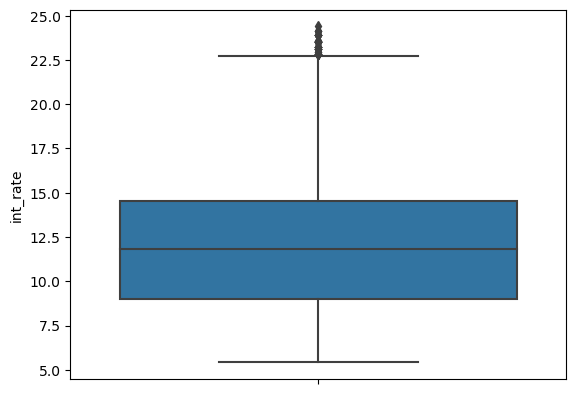

In [64]:
#Lets analyse the interest rates
df['int_rate'].describe()
sns.boxplot(df, y='int_rate')
plt.show()
##While median interest rates are around 11.5% most interest rates lies below 15%. There are few outliers abive 22.5%

In [65]:
#Calculate percentage of outliers in interest rates
df_int_out = df[df['int_rate'] > 22.5]
len(df_int_out)/len(df)
#0.1 percent outliers in interest rates. Dropping outlier rows in interest rates
df = df[df['int_rate'] < 22.5]
df['int_rate'].describe()
df.shape

(38853, 41)

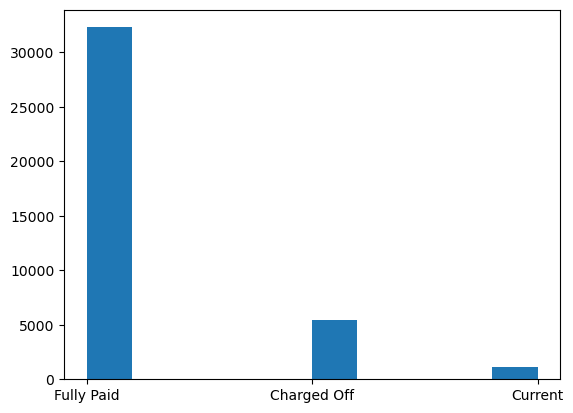

In [66]:
#Univariate analysis of Categorical variable (Unordered)
df['loan_status'].value_counts()
plt.hist(df['loan_status'])
plt.show()

#Majority of the loans are fully paid, there are very few current loans
#Around 13% loans are charged off

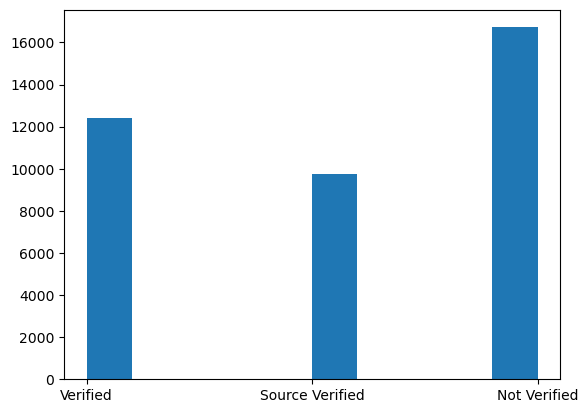

In [67]:
##Verification status###
df['verification_status'].value_counts()
plt.hist(df['verification_status'])
plt.show()

#Around 40% loans are there for which incomes are not verified.This might be a worrying sign for the company.

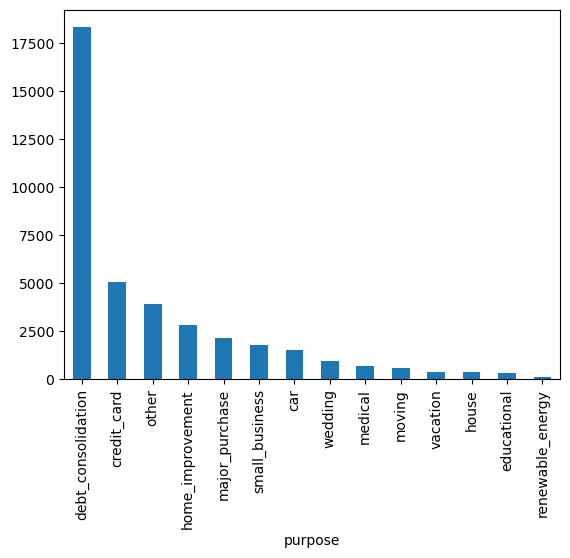

In [68]:
df['purpose'].value_counts().plot.bar()
plt.show()

#Most loans are for debt_consolidation.

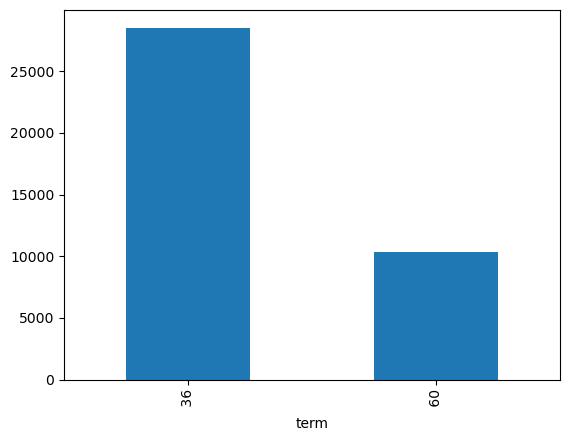

In [69]:
df['term'].value_counts().plot.bar()
plt.show()

#70% loans are taken for 3 year period

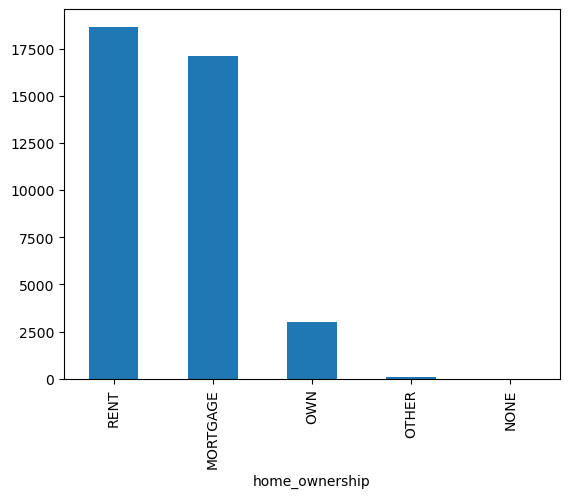

In [70]:
df['home_ownership'].value_counts().plot.bar()
plt.show()

#Only 6 percent of people applying for loans have own house.This is a deciding factor in loan disbursement

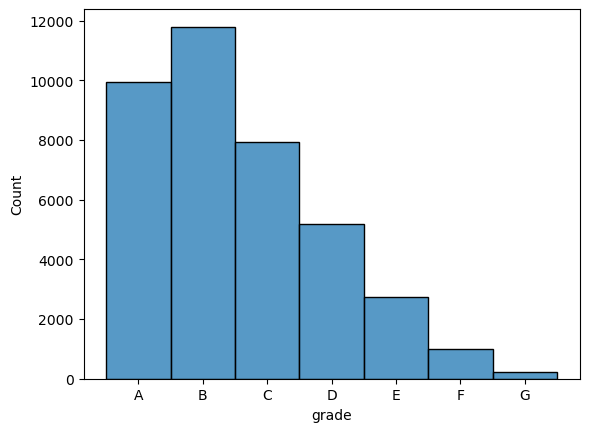

In [71]:
###Univariate analysis for ordered categorical variables ######
df['grade'].value_counts()
df = df.sort_values(by='grade')
sns.histplot(df['grade'])
plt.show()

##Most loans have grades A,B and C with maximum at B.The count increase from A to B and then decrease gradually.Very few loand oflow grades implies loans 
##are not aprooved for high risk individuals which is a good sign for the company

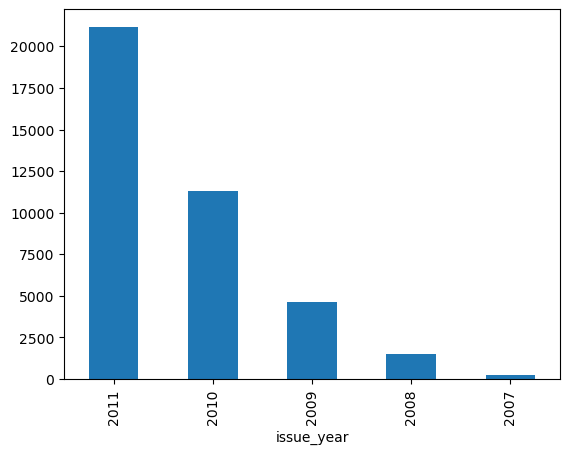

In [72]:
##Anlysis based on Loan issue date###
df['issue_d'] = pd.to_datetime(df['issue_d'],format='%b-%y')
df['issue_year'] = df['issue_d'].dt.year
df['issue_month'] = df['issue_d'].dt.month
df['issue_year'].value_counts().plot.bar()
plt.show()

#Number of sanctioned loans are exponentially increasing over a period from 2007 to 2011

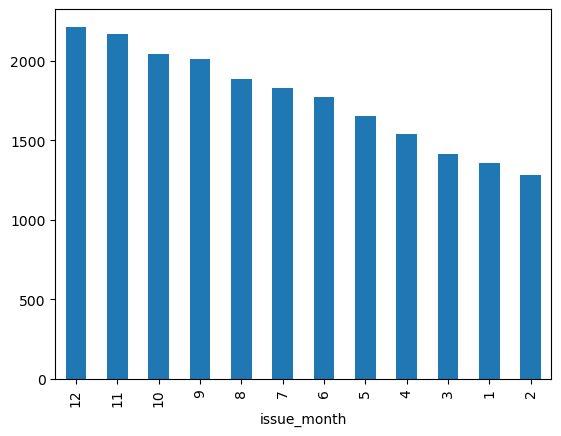

In [73]:
##Find for which month more loans are disbursed in 2011##
df_2011 = df[df['issue_year'] == 2011]
df_2011.sort_values(by='issue_month')
df_2011['issue_month'].value_counts().plot.bar()
plt.show()

#Loan disbursement gradually increases from starting to the end of year in 2011.Maximum disbursement happened on december.

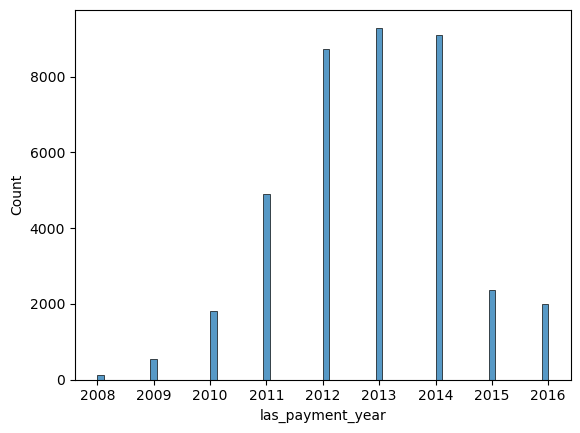

In [74]:
##Lets analyse another ordered categorical variable as loan payment date####
df['las_payment_year'] = df['last_pymnt_d'].dt.year
df['las_payment_month'] = df['last_pymnt_d'].dt.month
df = df.sort_values(by='las_payment_year')
sns.histplot(df['las_payment_year'])
plt.show()
#Number of payments done gradually increases from 2008 to 2013 where it peaks and then gradually decreases till 2016

# Bivariate analysis on record set having loan status as Full Payed and charged off

In [75]:
ldf = df[df['loan_status'] != 'Current']
ldf.shape

(37744, 45)

Text(0.5, 1.0, 'Distribution of Funded Amount for Loan Status')

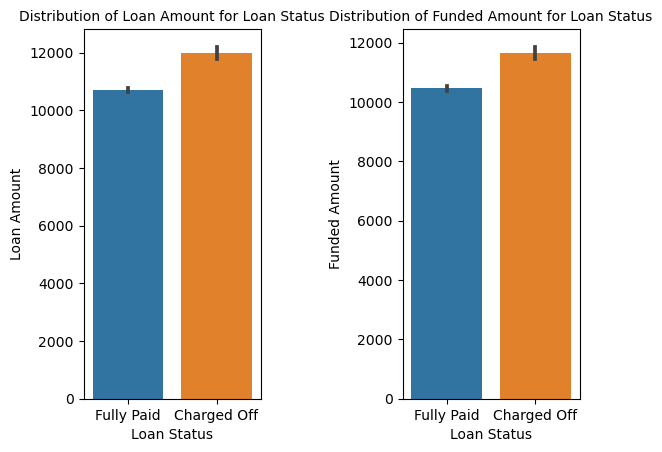

In [76]:
# Analysing Loan amount across Fully paid and charged off loan status
f, axes = plt.subplots(1, 2)
f.subplots_adjust(hspace=0.5, wspace=0.8)
sns.barplot(  y="loan_amnt", x= "loan_status", data=ldf,  orient='v' , ax=axes[0])
axes[0].set_xlabel('Loan Status',size = 10)
axes[0].set_ylabel('Loan Amount',size = 10)
sns.barplot(  y="funded_amnt", x= "loan_status", data=ldf,  orient='v', ax=axes[1])
axes[1].set_ylabel('Funded Amount',size = 10)
axes[1].set_xlabel('Loan Status',size = 10)
axes[0].set_title( "Distribution of Loan Amount for Loan Status",size = 10)
axes[1].set_title( "Distribution of Funded Amount for Loan Status", size = 10)
# We can see that LC should be take extra precaution when approving a loan amount over 10,000/-

Text(0.5, 1.0, 'Distribution of Loan Amount for Loan Status using box plot')

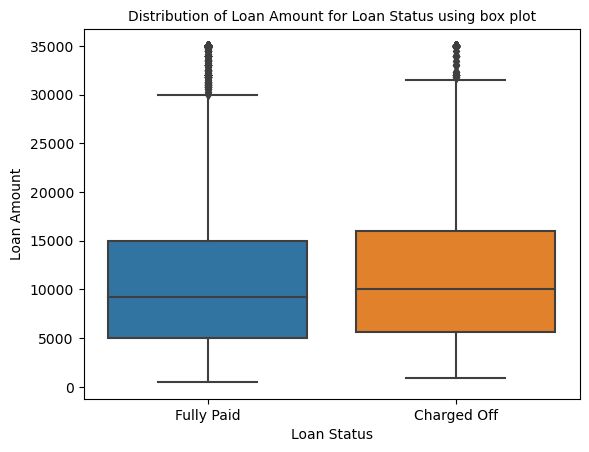

In [77]:
ax = sns.boxplot(ldf, x="loan_status", y="loan_amnt")
ax.set_xlabel('Loan Status',size = 10)
ax.set_ylabel('Loan Amount',size = 10)
ax.set_title( "Distribution of Loan Amount for Loan Status using box plot",size = 10)

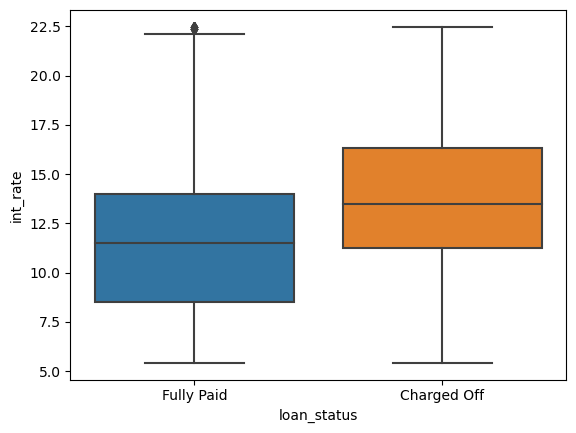

In [78]:
# Analysing interest rate across Fully paid and charged off loan status
warnings.filterwarnings('ignore')
ldf['int_rate'] = ldf['int_rate'].astype('float64')
ax = sns.boxplot(ldf, x="loan_status", y="int_rate")

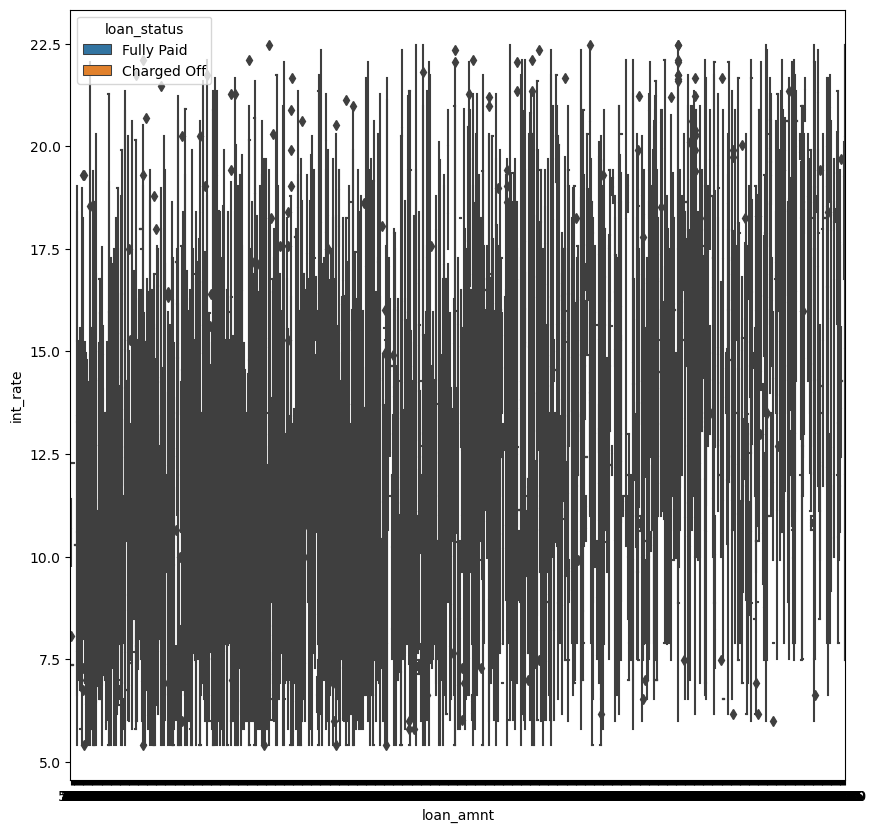

In [79]:
# Let's analyse relation between loan amount and interest rate w.r.t loan status
plt.figure(figsize=(10,10))
sns.boxplot(data =ldf,x='loan_amnt', y='int_rate', hue ='loan_status')
plt.show()
# We see that as there are too many entries of loan amounts on x-axis below figure is not readable. Hence loan amount could be divided into bins.

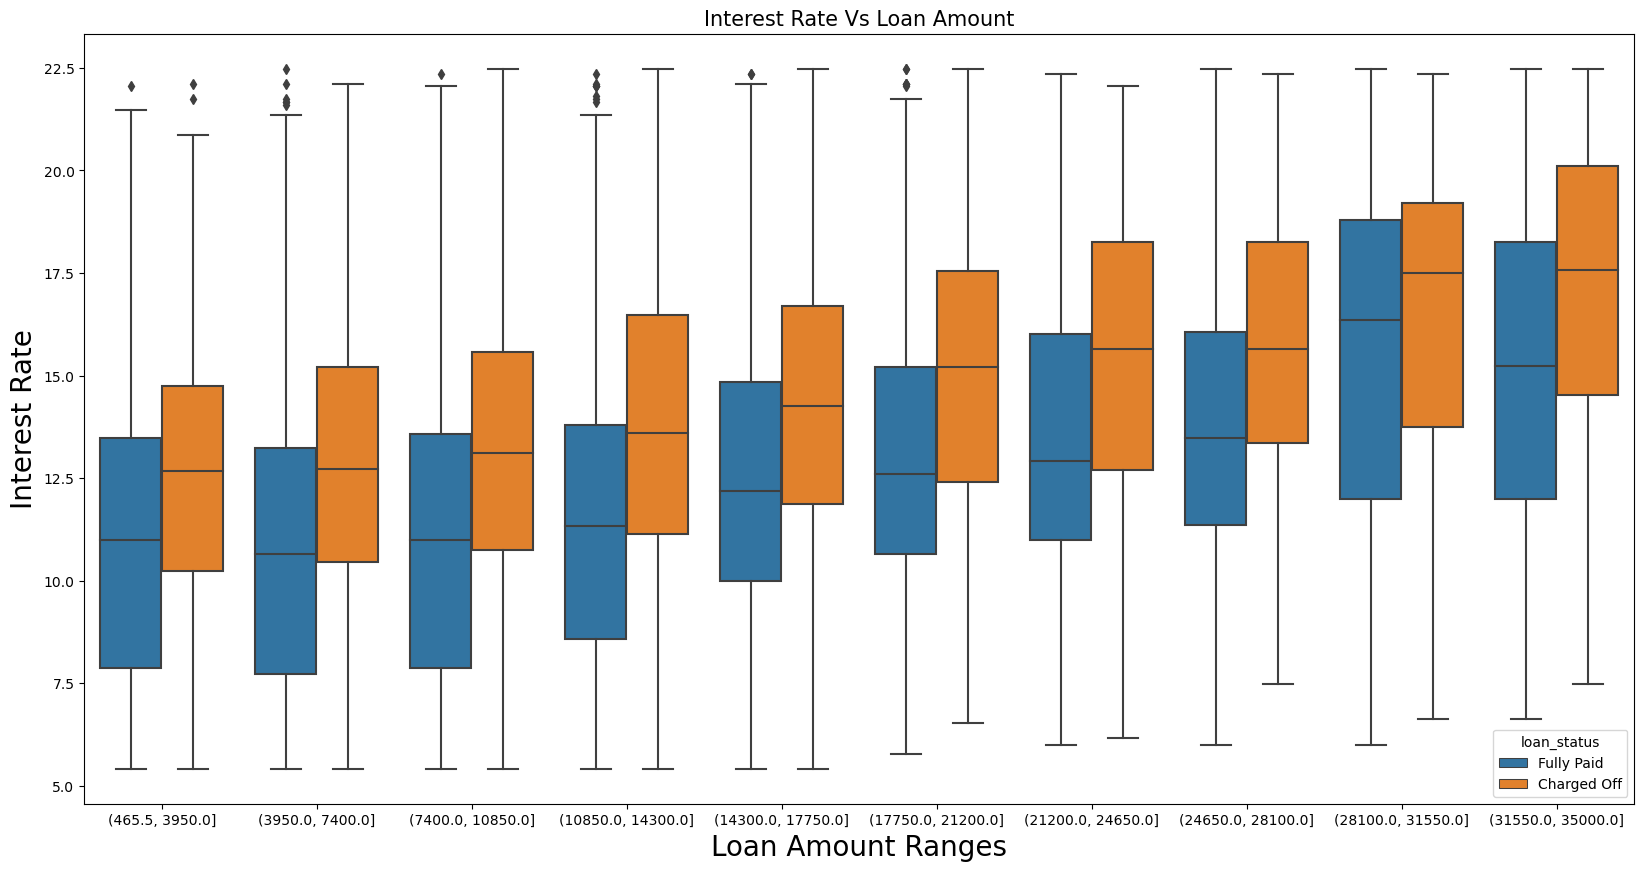

In [80]:
# Dividing loan amounts into bins to plot graph which is readable.
ldf['loan_amnt_range'] = pd.cut(ldf['loan_amnt'], bins=10)
plt.figure(figsize=(20,10))
ax = sns.boxplot(data =ldf,x='loan_amnt_range', y='int_rate', hue ='loan_status')
ax.set_xlabel('Loan Amount Ranges',size = 20)
ax.set_ylabel('Interest Rate',size = 20)
ax.set_title( "Interest Rate Vs Loan Amount",size = 15)
plt.show()
# We can see that charged off category has a significant high interest rate compared to fully paid category across all loan amount ranges.
# Also, people tend to default more when interest rate crosses over 14-17.5%
# People applied for loan amount between 28K - 35K at a rate of interest 17.5% or above tends to default more.

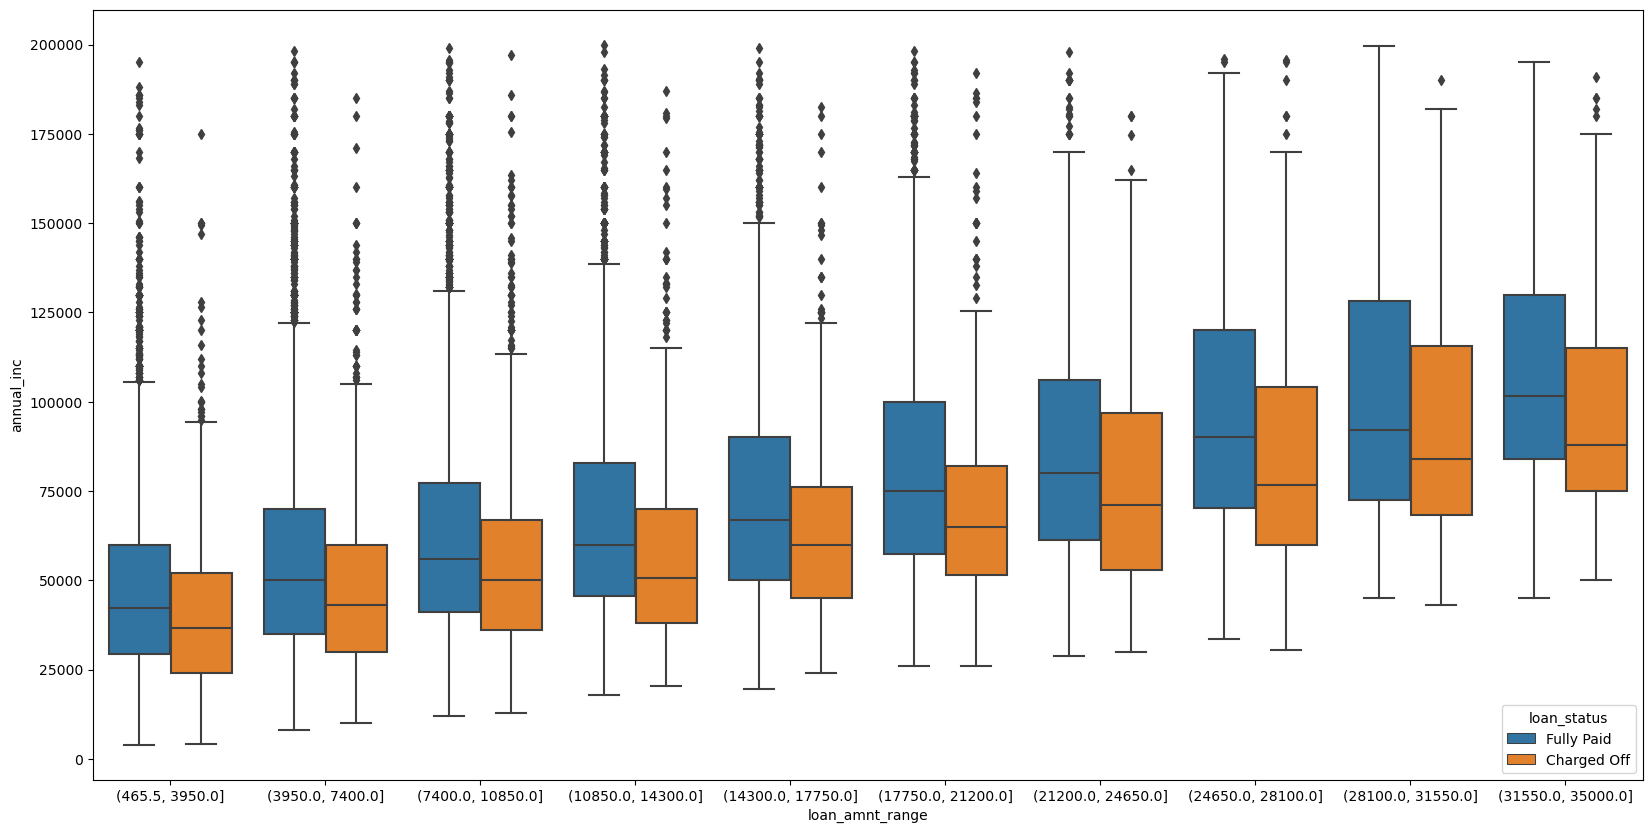

In [81]:
# Let's analyse relation between loan amount and annual income w.r.t loan status
plt.figure(figsize=(20,10))
sns.boxplot(data =ldf,x='loan_amnt_range', y='annual_inc', hue ='loan_status')
plt.show()

In [82]:
ldf['term']= ldf['term'].astype('int64')

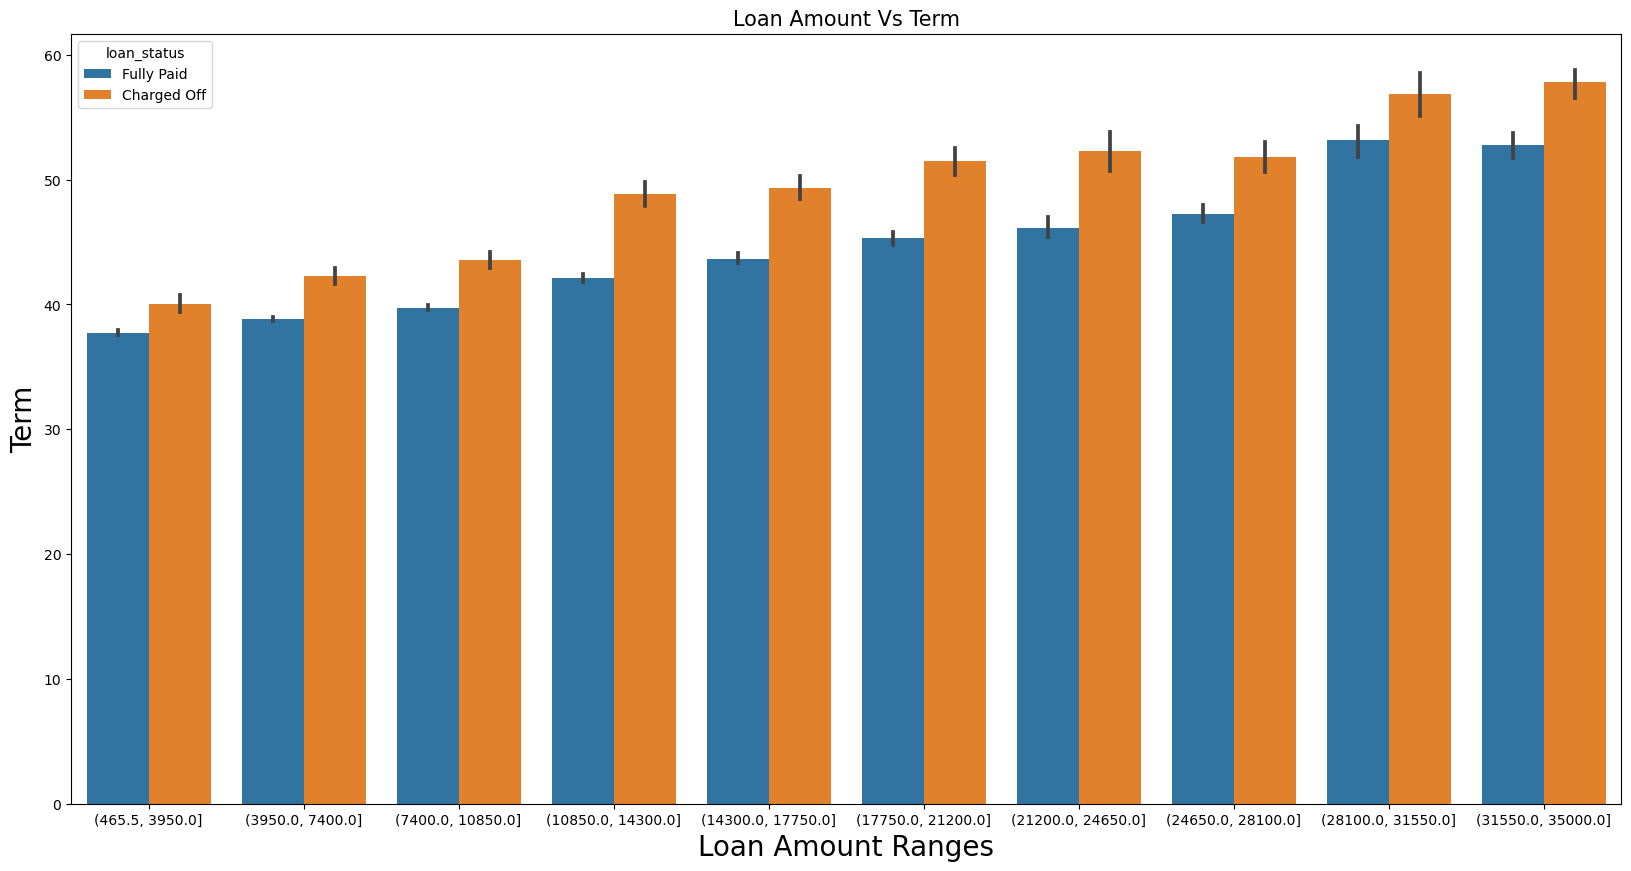

In [83]:
# Let's analyse relation between loan amount and term w.r.t loan status
plt.figure(figsize=(20,10))
ax=sns.barplot(data =ldf,x='loan_amnt_range', y='term', hue ='loan_status')
ax.set_xlabel('Loan Amount Ranges',size = 20)
ax.set_ylabel('Term',size = 20)
ax.set_title( "Loan Amount Vs Term",size = 15)
plt.show()
# In the graph below, the fully paid bar shows the max term limit for which loan could be approved for the respective loan amount ranges. Term beyond this limit could be seen tend to fall under charged off.

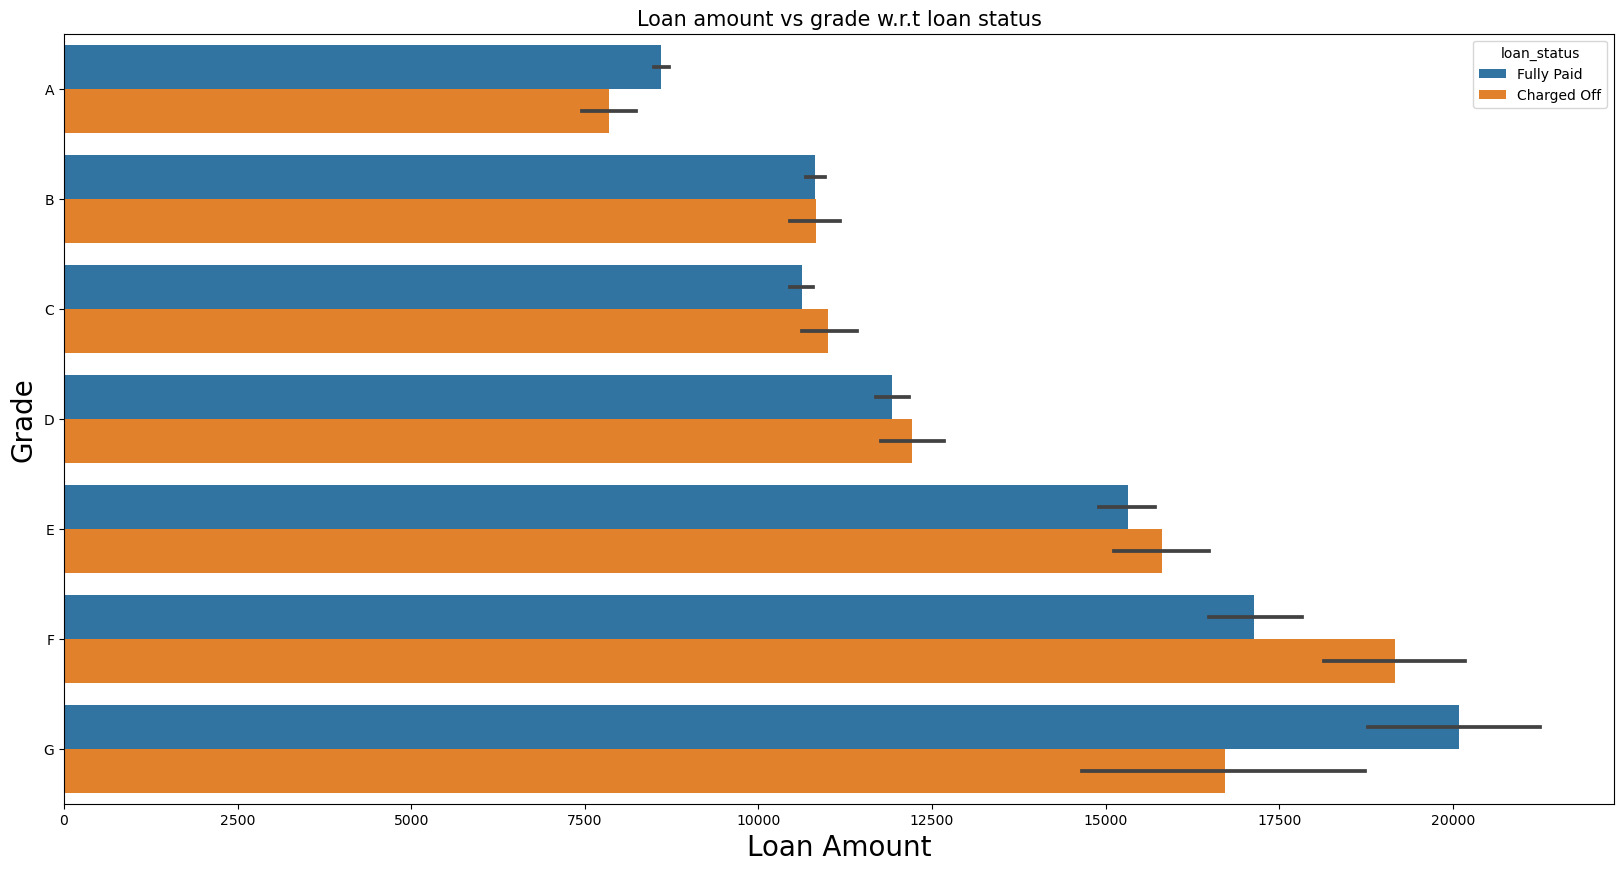

In [84]:
# loan amount vs grade w.r.t loan status
plt.figure(figsize=(20,10))
ax=sns.barplot(data =ldf,x='loan_amnt', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
ax.set_xlabel('Loan Amount',size = 20)
ax.set_ylabel('Grade',size = 20)
ax.set_title( "Loan amount vs grade w.r.t loan status",size = 15)
plt.show()
# we see loan amount increases for grades from D to G. Thus, high loan amount is at higher risk factor.
# For grade A chances of default is less compared to fully paid. For grade B chances are 50-50 and for grades C,D,E,F the risk of default increases.

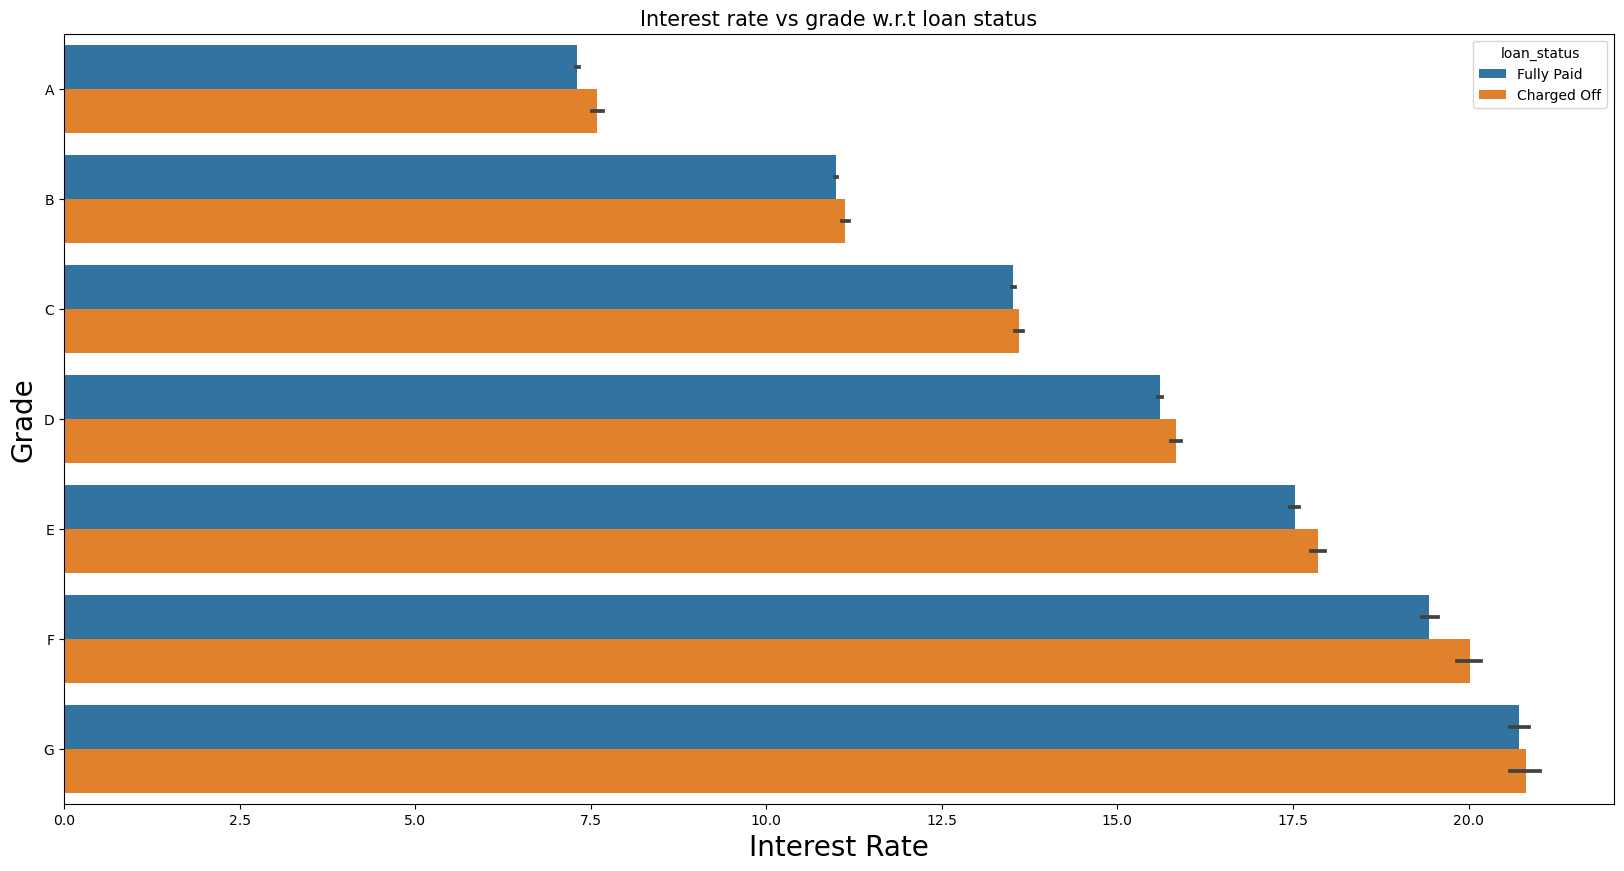

In [85]:
# Int rate vs grade w.r.t loan status
plt.figure(figsize=(20,10))
ax=sns.barplot(data =ldf,x='int_rate', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
ax.set_xlabel('Interest Rate',size = 20)
ax.set_ylabel('Grade',size = 20)
ax.set_title( "Interest rate vs grade w.r.t loan status",size = 15)
plt.show()

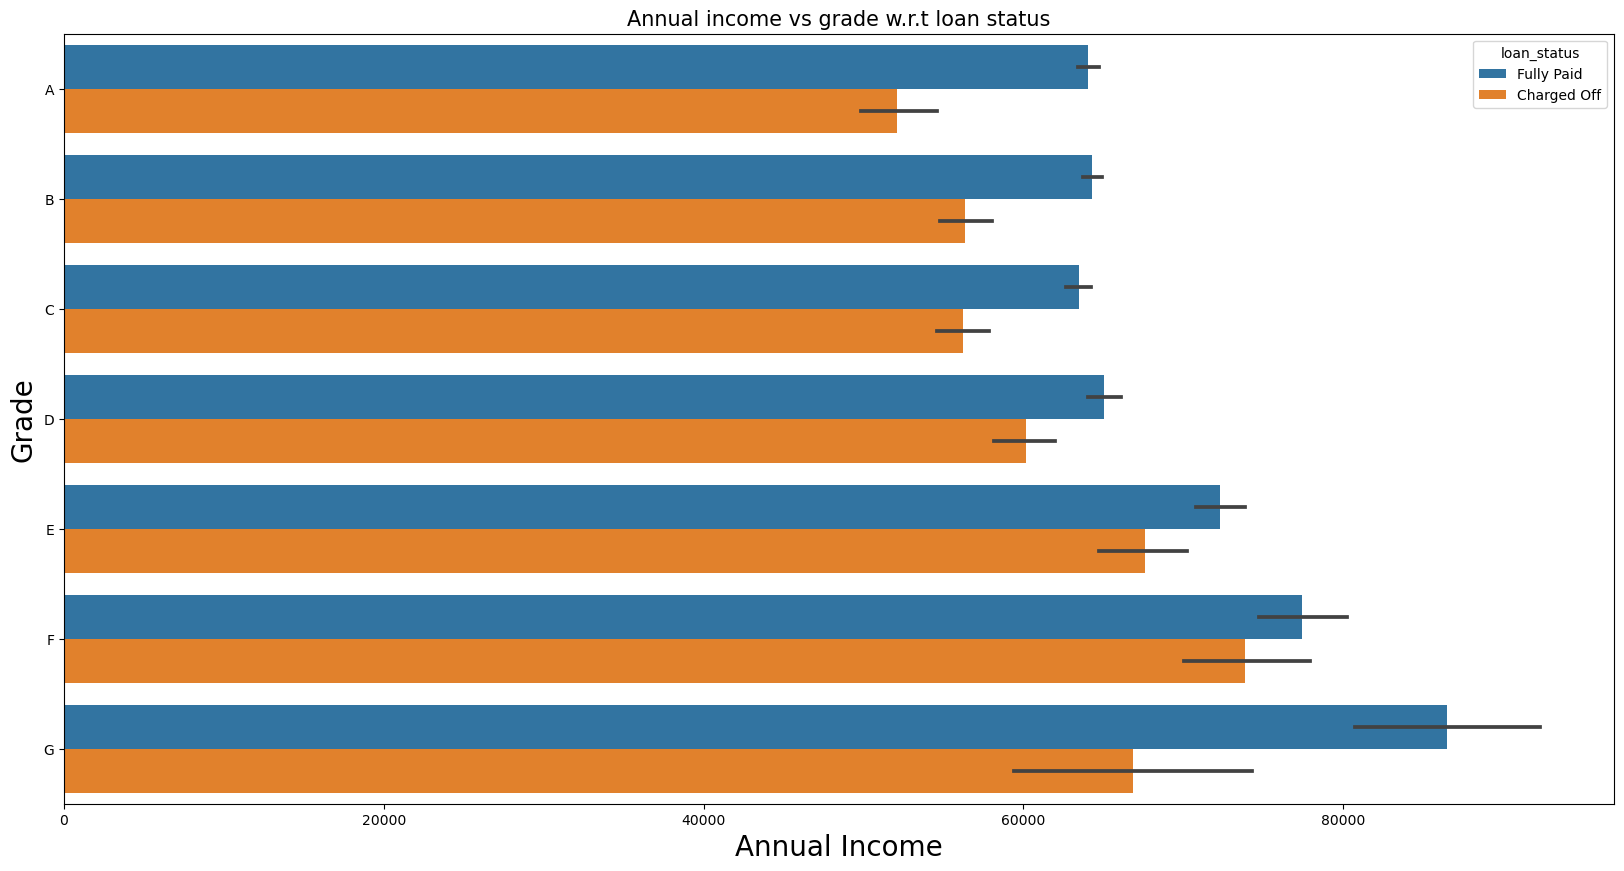

In [86]:
# Annualincome vs grade w.r.t loan status
plt.figure(figsize=(20,10))
ax=sns.barplot(data =ldf,x='annual_inc', y='grade', hue ='loan_status', order=['A','B','C','D','E','F','G'])
ax.set_xlabel('Annual Income',size = 20)
ax.set_ylabel('Grade',size = 20)
ax.set_title( "Annual income vs grade w.r.t loan status",size = 15)
plt.show()
# From this and above graph we can say that grade G is for people with high income, high loan amount and has high interest rate.
# We also see that for grade G, the people with annual income less than equal to 70K and interest rate more than 20% tend to default. Hence at high risk

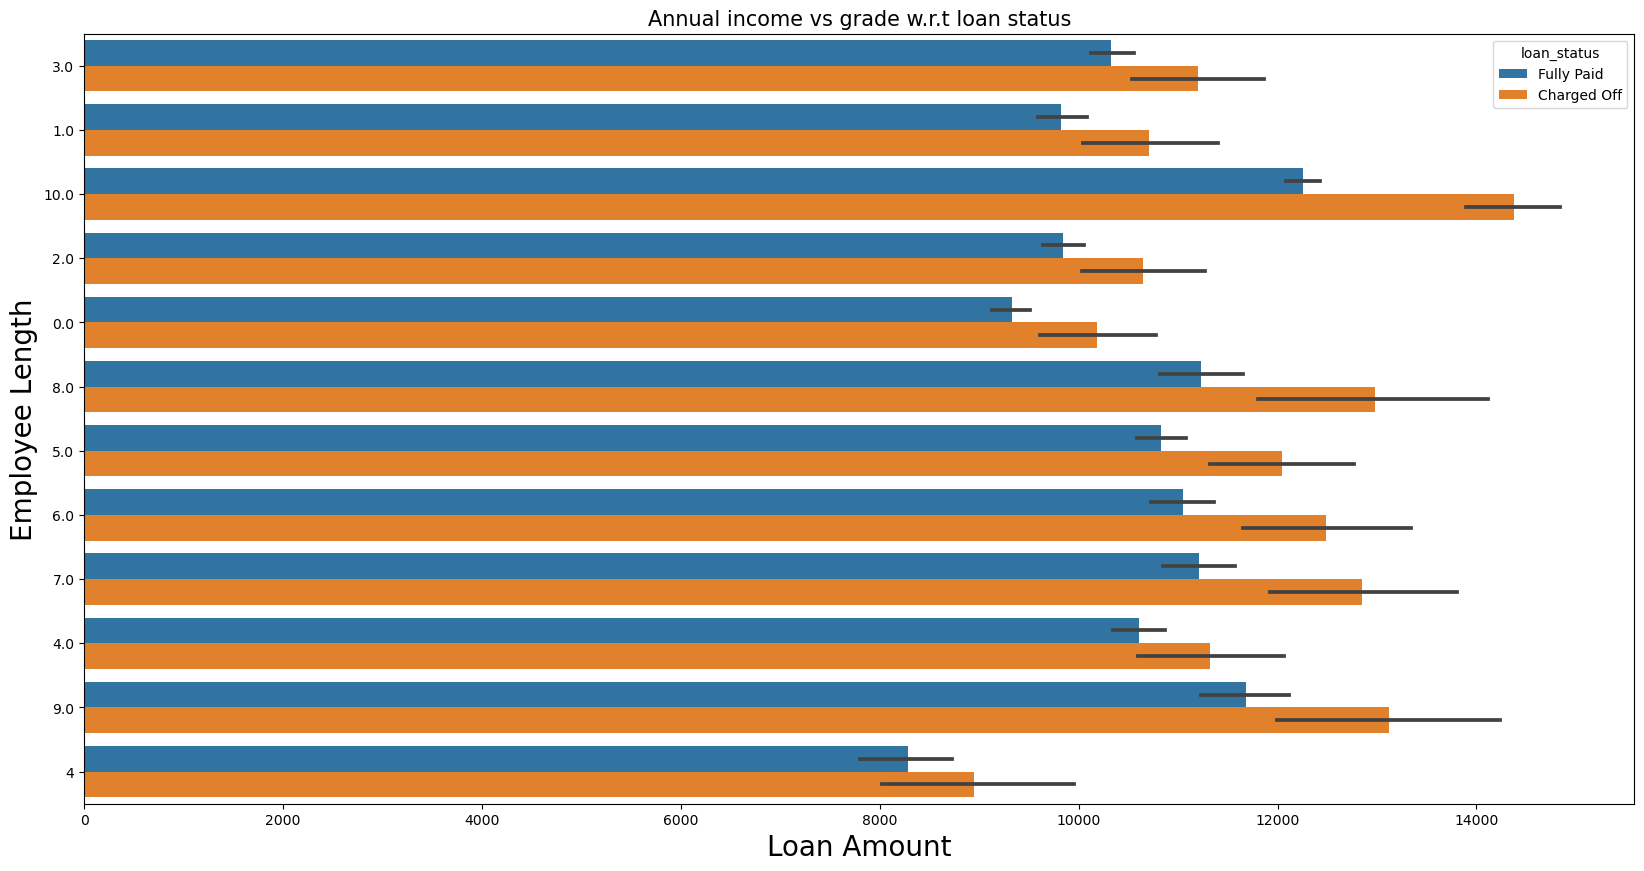

In [87]:
# loan amount vs emp length w.r.t loan status
plt.figure(figsize=(20,10))
ax=sns.barplot(data =ldf,x='loan_amnt', y='emp_length', hue ='loan_status')
ax.set_xlabel('Loan Amount',size = 20)
ax.set_ylabel('Employee Length',size = 20)
ax.set_title( "Annual income vs grade w.r.t loan status",size = 15)
plt.show()
# We can see that people with more employment length has received an approved loan of higher amounts compared to others.
# People with 10+ emp length and a loan amount of more than 12K tends to default. Thus we can say that loan amount of more than 12K can not be approved just on the basis of emp length. Emp length along with other variables can be used to determine the risk factor.

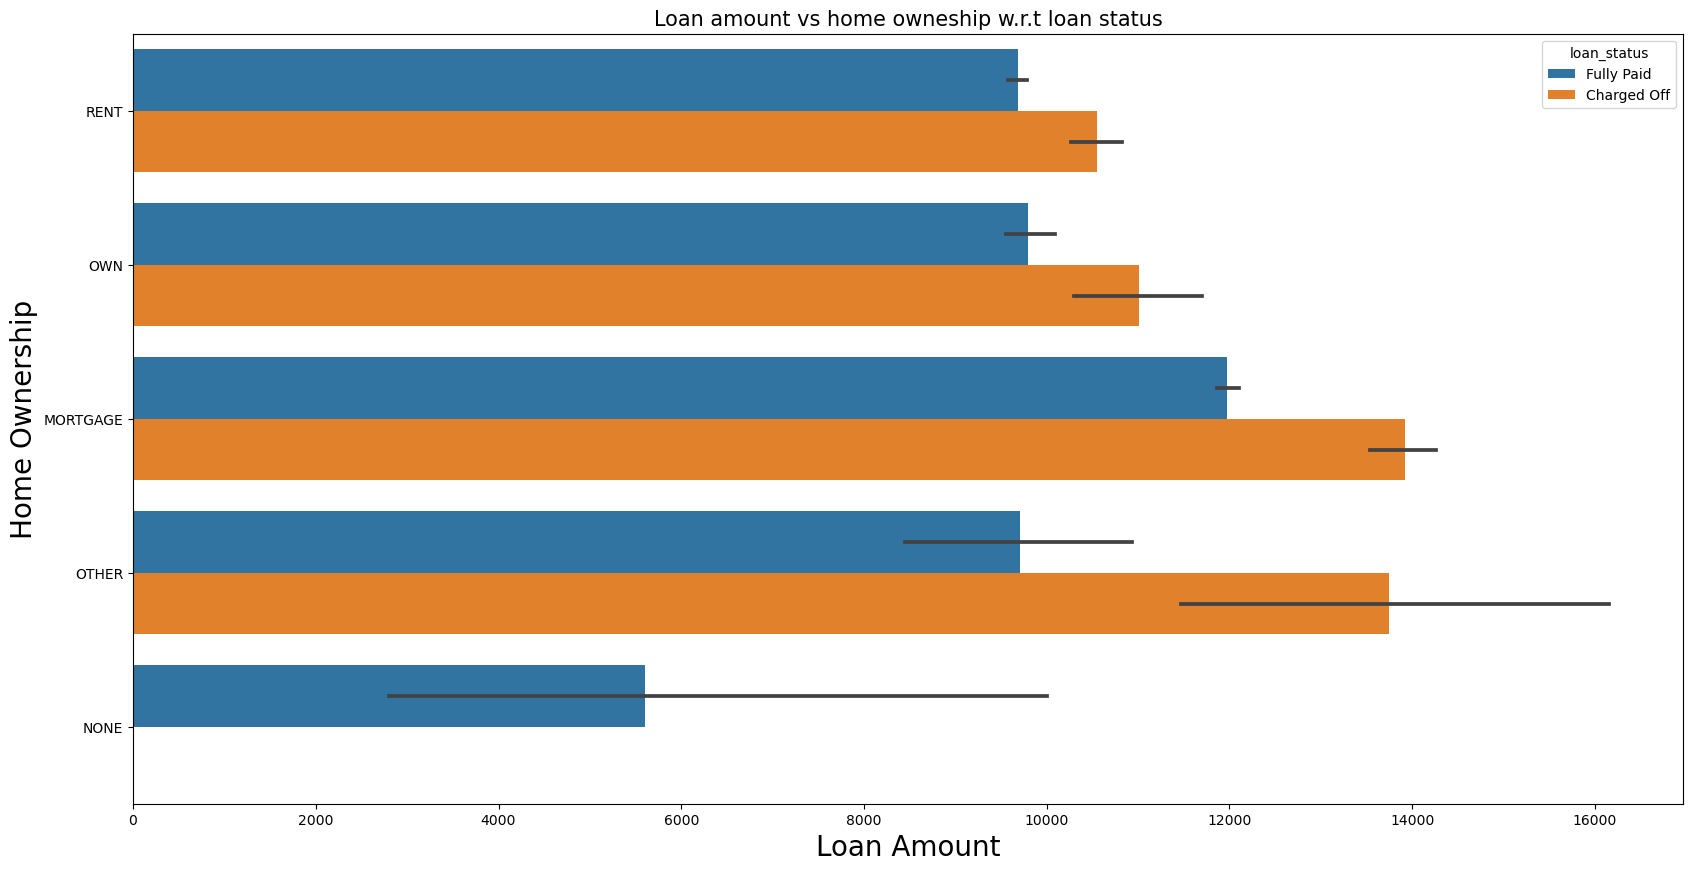

In [88]:
# loan amount vs home owneship w.r.t loan status
plt.figure(figsize=(20,10))
ax = sns.barplot(data =ldf,x='loan_amnt', y='home_ownership', hue ='loan_status')
ax.set_ylabel('Home Ownership',size = 20)
ax.set_xlabel('Loan Amount',size = 20)
ax.set_title( "Loan amount vs home owneship w.r.t loan status",size = 15)
plt.show()
# This shows loan amount of more than 12K with mortgage and int rate more than 11.5% could be a high risk factor. This also shows home ownership should be identified before approving loan as there are many defaults seen in other category. Whereas no defaults in none criteria might be for people living in their parent's home. 

In [89]:
#plt.figure(figsize=(20,10))
#sns.barplot(data =ldf,x='annual_inc', y='int_rate', hue ='loan_status')
#plt.show()
# unreadable graph hence need to create income ranges

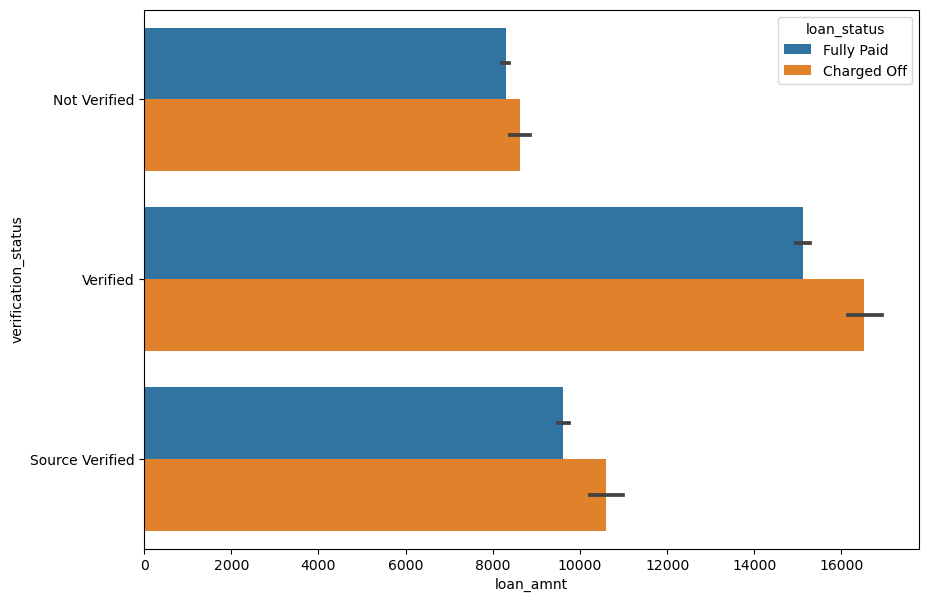

In [90]:
# loan amount vs verification status w.r.t loan status
plt.figure(figsize=(10,7))
sns.barplot(data =ldf,x='loan_amnt', y='verification_status', hue ='loan_status')
plt.show()
# This shows that verified applicants get approval for higher amount of loan.

In [91]:
# loan status vs issue month & year
ldf['issue_d'] = pd.to_datetime(ldf['issue_d'],format='%b-%y')
ldf['issue_year'] = ldf['issue_d'].dt.year
ldf['issue_month'] = ldf['issue_d'].dt.month

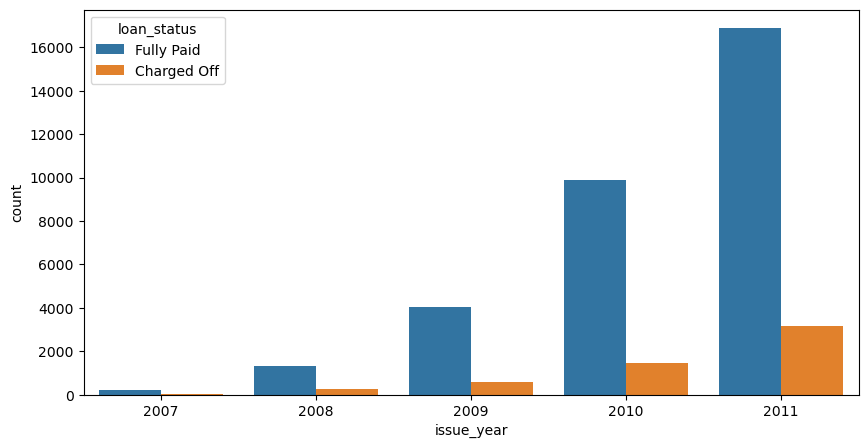

In [92]:
plt.figure(figsize=(10,5))
sns.countplot(x=ldf.issue_year,hue=ldf.loan_status)
#sns.countplot(x=ldf.issue_month,hue=ldf.loan_status)
plt.show()
# It shows that more loans were issued during the last quarter or the month, decmeber being at the peak. It also shows that there was a significant increase in the number of loans issued from 2007-2011. A drastic rise in loan issued in the december month of 2011.

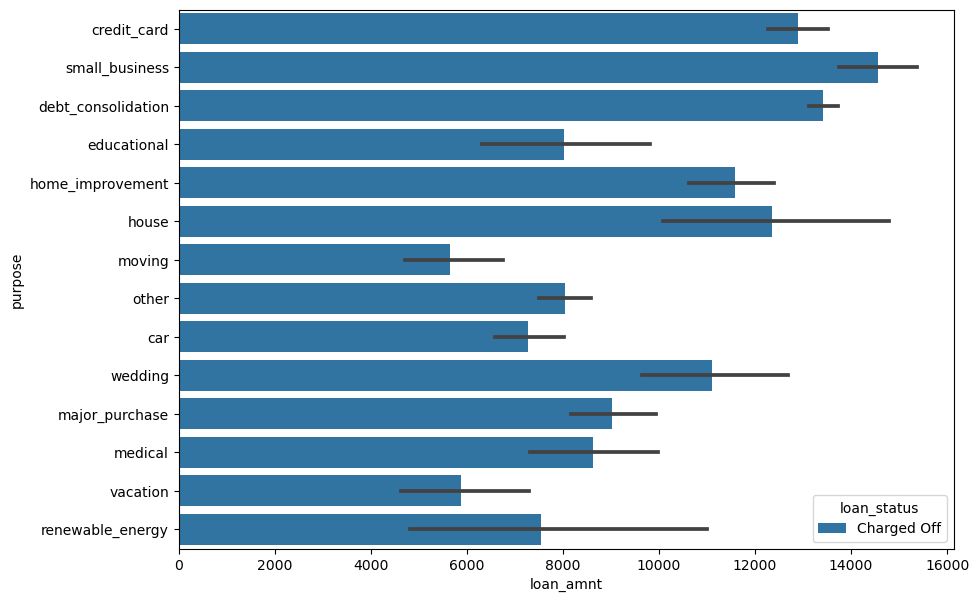

In [93]:
# loan amount vs purpose w.r.t loan status
plt.figure(figsize=(10,7))
sns.barplot(data =ldf[ldf.loan_status == 'Charged Off'],x='loan_amnt', y='purpose', hue ='loan_status')
plt.show()
# It shows that a high amount of loan taken for small business was charged off followed by debt consolidation. Hence LC needs to evaluate these two purpose critically.
# Maximum number of loans charged off was taken for the purpose of debt consolidation.

<Axes: xlabel='count', ylabel='purpose'>

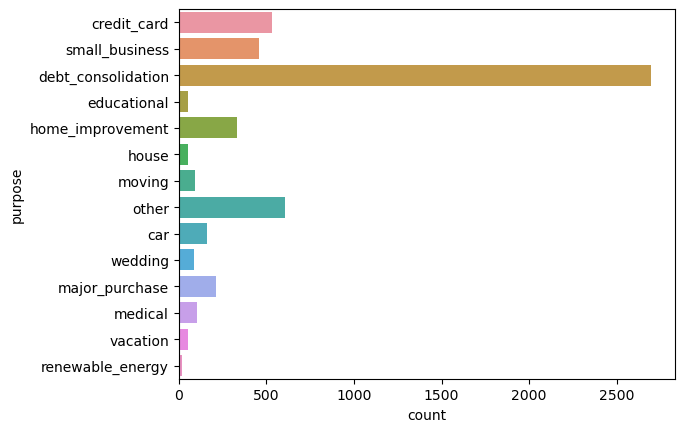

In [94]:
sns.countplot(y ='purpose', data=ldf[ldf.loan_status == 'Charged Off'])

Text(0.5, 1.0, 'Distribution of loan across states w.r.t loan status')

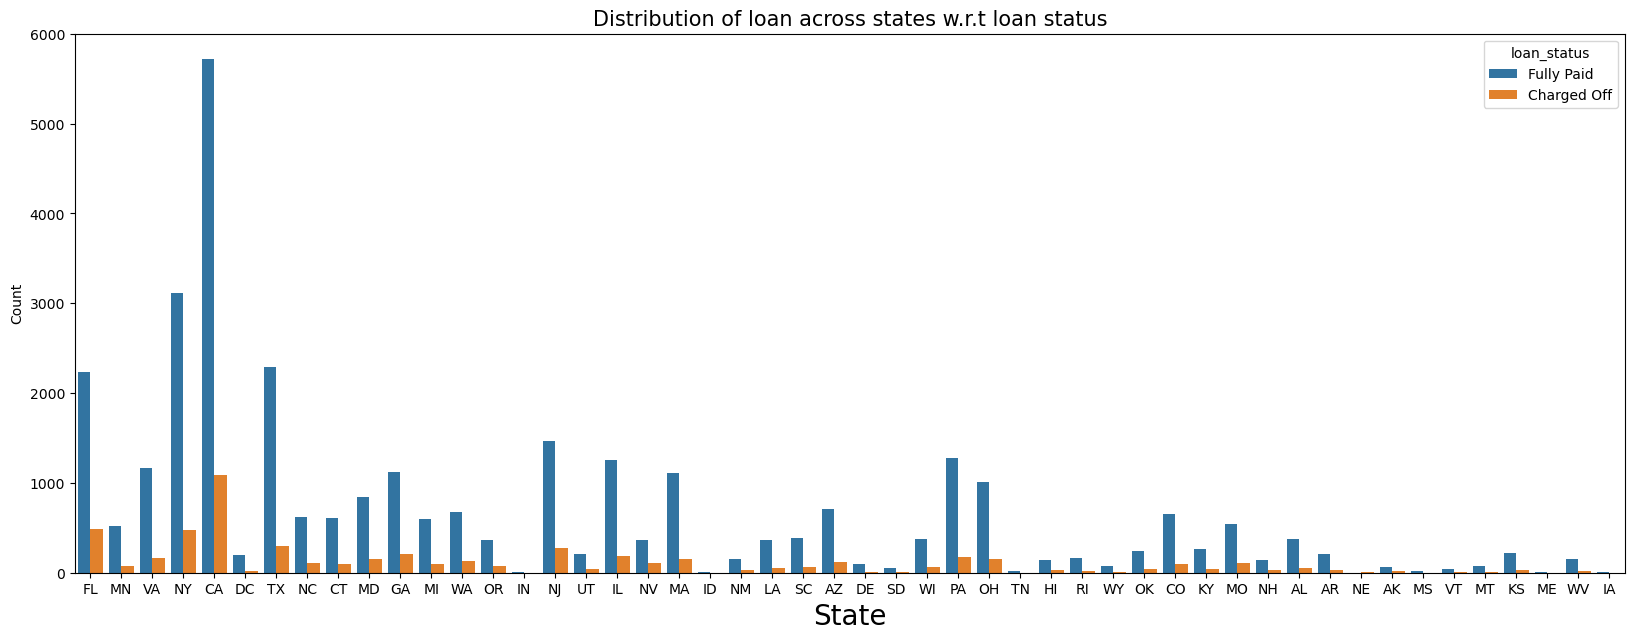

In [95]:
# A high count of loan is recorded for the metro cities such as California, New york. No abnormal behaviour in terms of charged off loans w.r.t state.
plt.figure(figsize=(20,7))
ax=sns.countplot(x ='addr_state', data=ldf, hue=ldf.loan_status)
ax.set_xlabel('State',size = 20)
ax.set_ylabel('Count',size = 10)
ax.set_title( "Distribution of loan across states w.r.t loan status",size = 15)

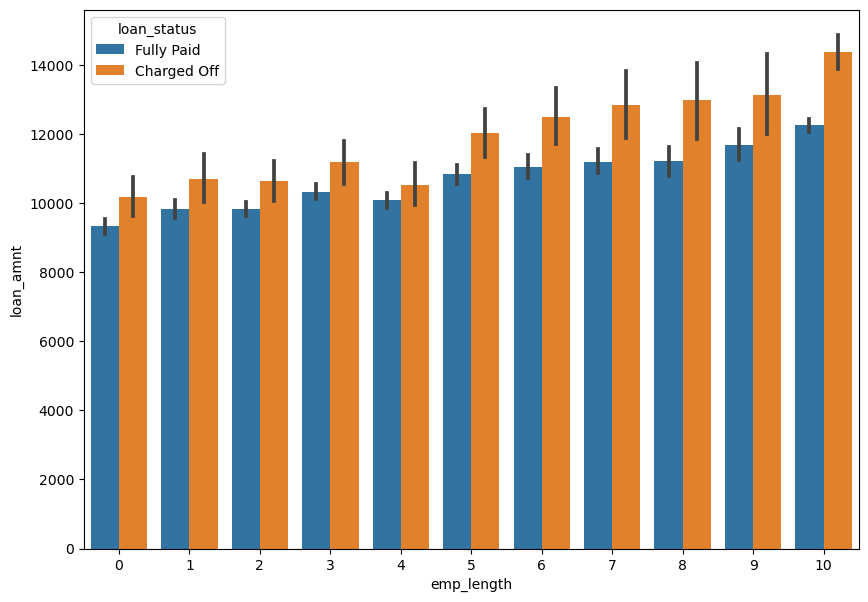

In [96]:
# Comparison of employee length with verification status
ldf['emp_length'] = ldf['emp_length'].astype(int)
# loan amount vs verification status w.r.t loan status
plt.figure(figsize=(10,7))
sns.barplot(data =ldf,x='emp_length', y='loan_amnt', hue ='loan_status')
plt.show()
# This shows employees with longer tenure gets higher loan amount and also has higher chances of charged off loan.

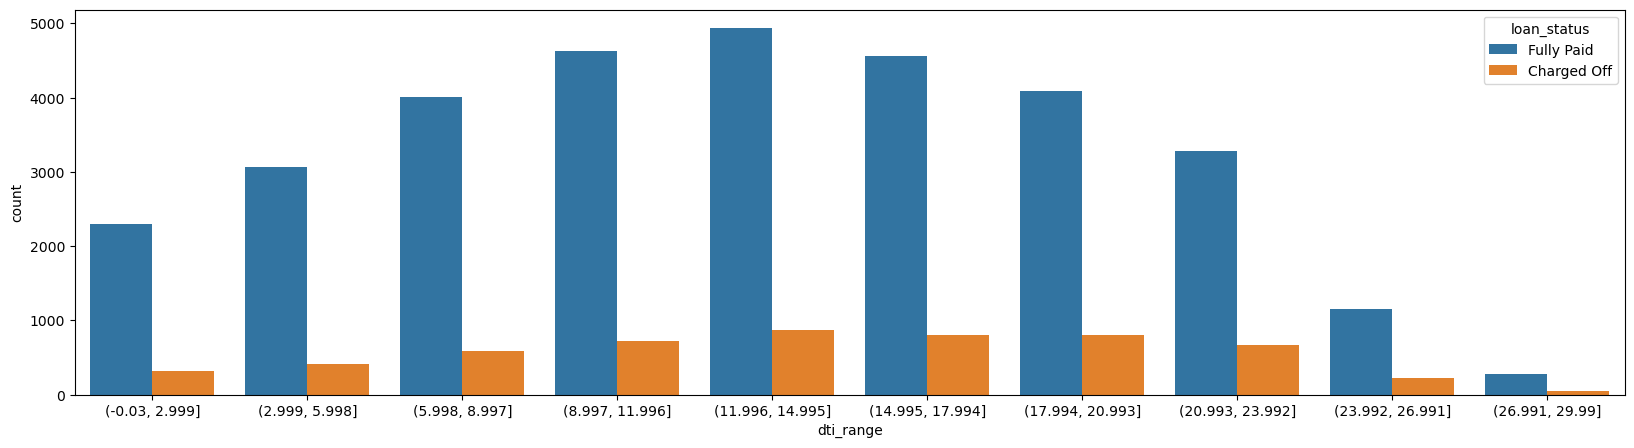

In [97]:
# Comparison of DTI over grade for loan status

ldf['dti_range'] = pd.cut(ldf['dti'], bins=10)
#sns.boxplot(ldf['dti'])
plt.figure(figsize=(20,5))
sns.countplot(data=ldf,x='dti_range',hue='loan_status')
plt.show()

#Some optimal dti range for which maximum number of loans are disbursed.
#Charged off loans are not changing much with the different dti range
#Loans disbursed for highest dti range as 29.DTI HIGHER than 30 loans are not disbursed.

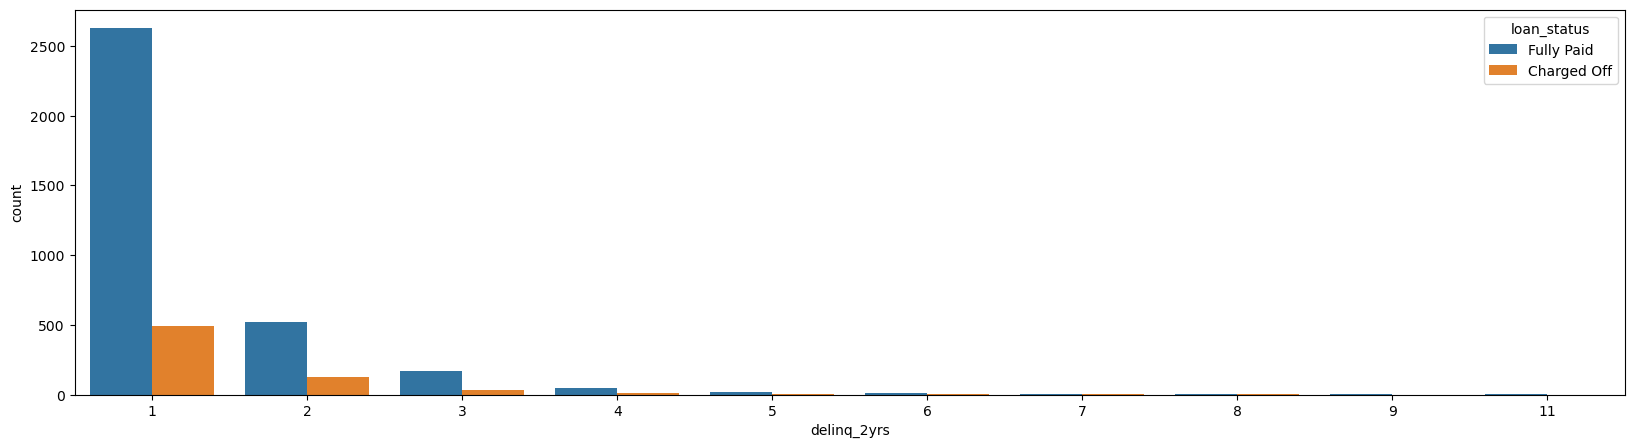

In [98]:
plt.figure(figsize=(20,5))
ldf_delinq = ldf[ldf['delinq_2yrs'] > 0]
sns.countplot(x ='delinq_2yrs', data=ldf_delinq, hue=ldf.loan_status)
#sns.countplot(x ='inq_last_6mths', data=ldf[ldf.loan_status == 'Charged Off'], hue=ldf.loan_status)
plt.show()
# It shows that for delinq in past 2 years 0 or 1 number of times people are getting their loan approved. 
# For delinq 2yrs more than 1 the amount of loans given decreases drastically which is ideal for the LC.

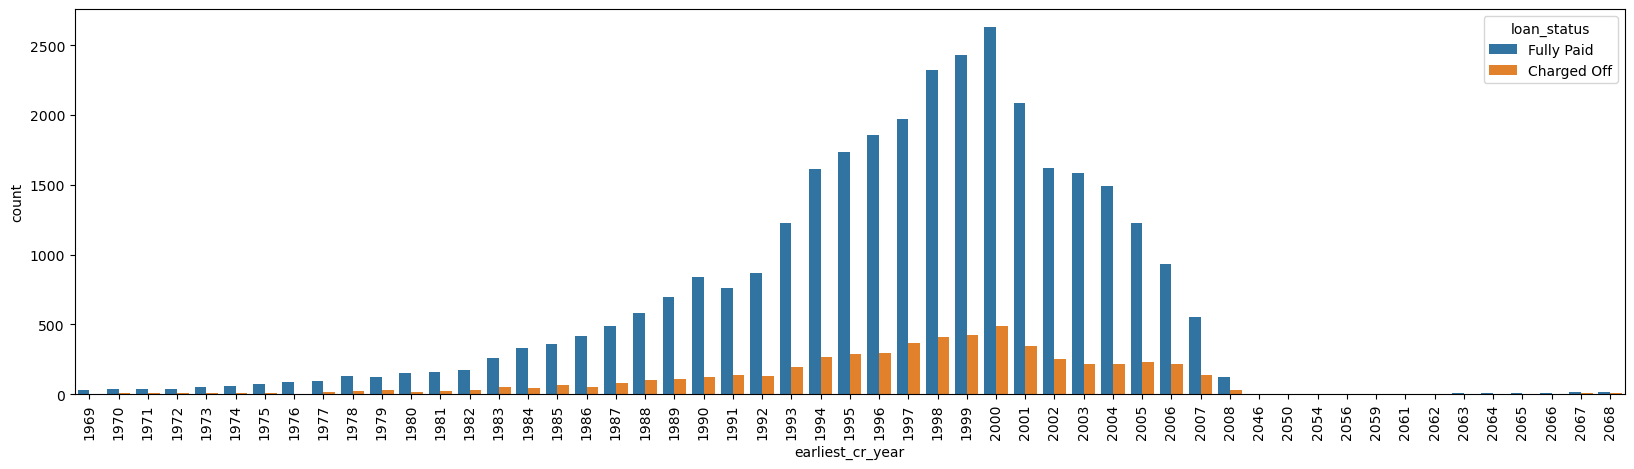

In [99]:
plt.figure(figsize=(20,5))
ldf['earliest_cr_line'] = pd.to_datetime(ldf['earliest_cr_line'],format='%b-%y')
ldf['earliest_cr_year'] = ldf['earliest_cr_line'].dt.year
ldf['earliest_cr_month'] = ldf['earliest_cr_line'].dt.month
#ldf['earliest_cr_year'].value_counts().plot.bar()
sns.countplot(x ='earliest_cr_year', data=ldf, hue=ldf.loan_status)
plt.xticks(rotation=90)
plt.show()
# It shows that people having more than 10 years of credit history has a higher chances of getting loans sanctioned.
# The ratio of defaulters to the total number of loans sanctioned is much less for people with older credit history (Considering year range from 2000-2011).

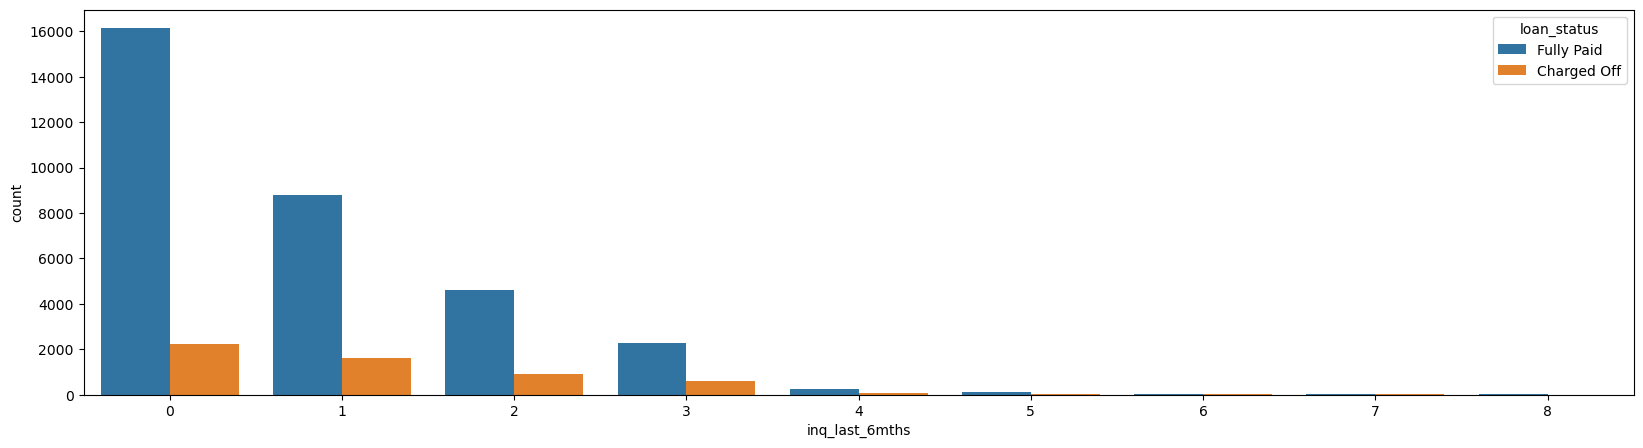

In [100]:
plt.figure(figsize=(20,5))
sns.countplot(data=ldf,x='inq_last_6mths',hue='loan_status')
plt.show()

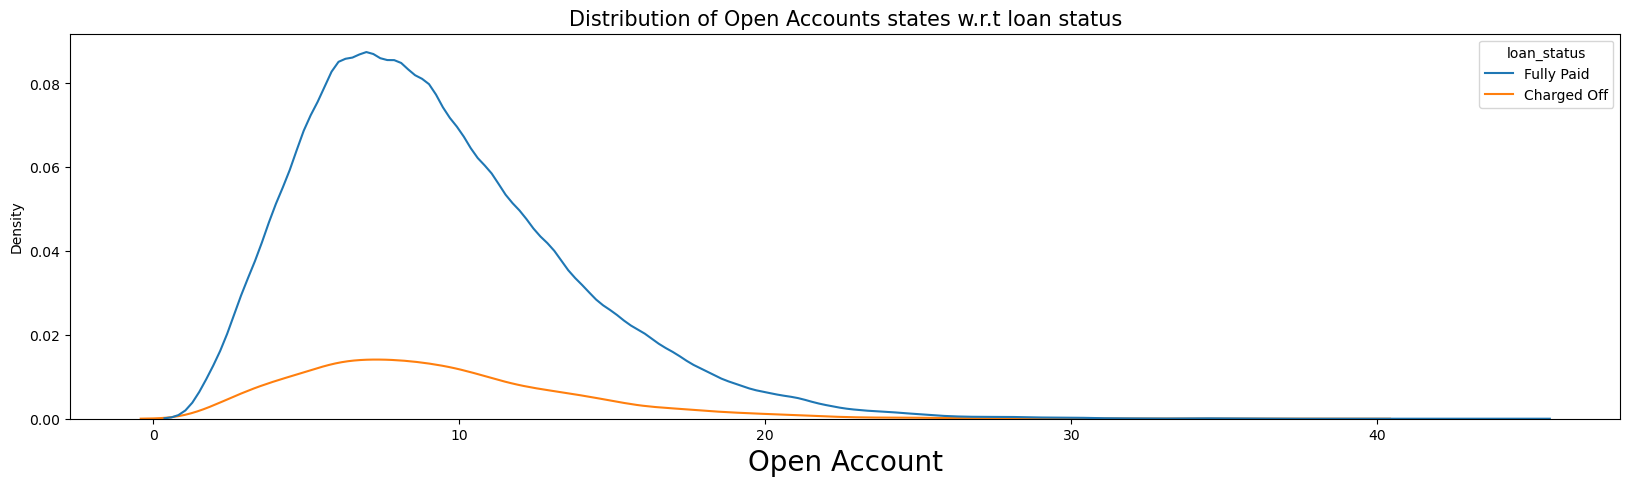

In [101]:
plt.figure(figsize=(20,5))
ax=sns.kdeplot(x ='open_acc', data=ldf, hue=ldf.loan_status)
ax.set_xlabel('Open Account',size = 20)
ax.set_title( "Distribution of Open Accounts states w.r.t loan status",size = 15)
plt.show()
# For open credit lines from 6-8, the chances of getting loan is higher.

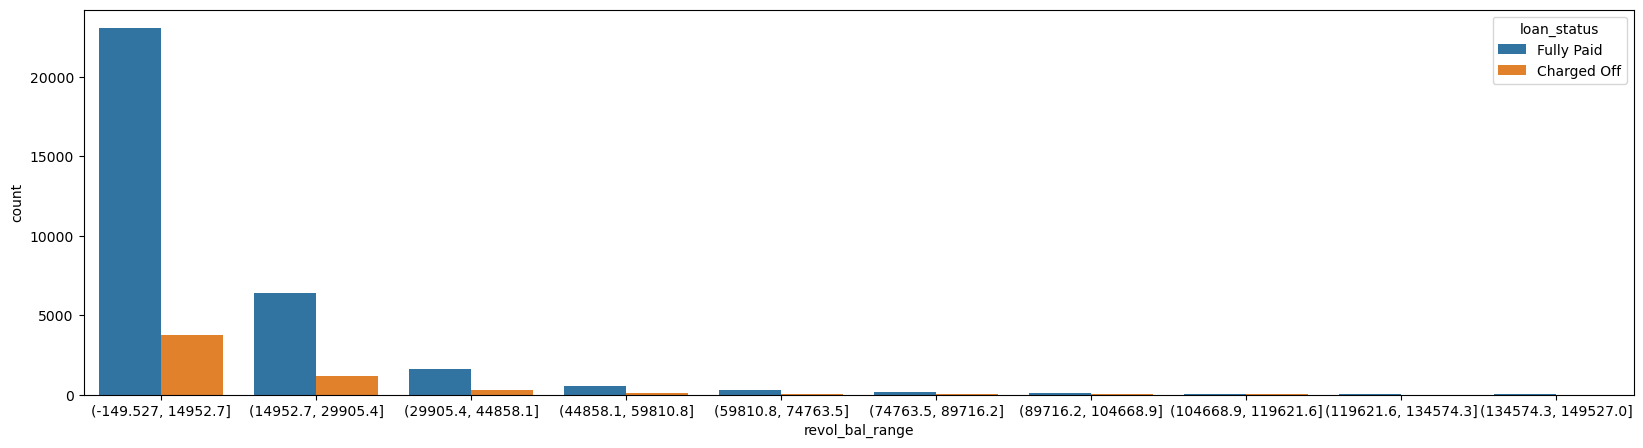

In [102]:
ldf['revol_bal_range'] = pd.cut(ldf['revol_bal'], bins=10)
plt.figure(figsize=(20,5))
sns.countplot(x ='revol_bal_range', data=ldf, hue=ldf.loan_status)
plt.show()
# Greater the revolving balance lesser the chances of getting loans

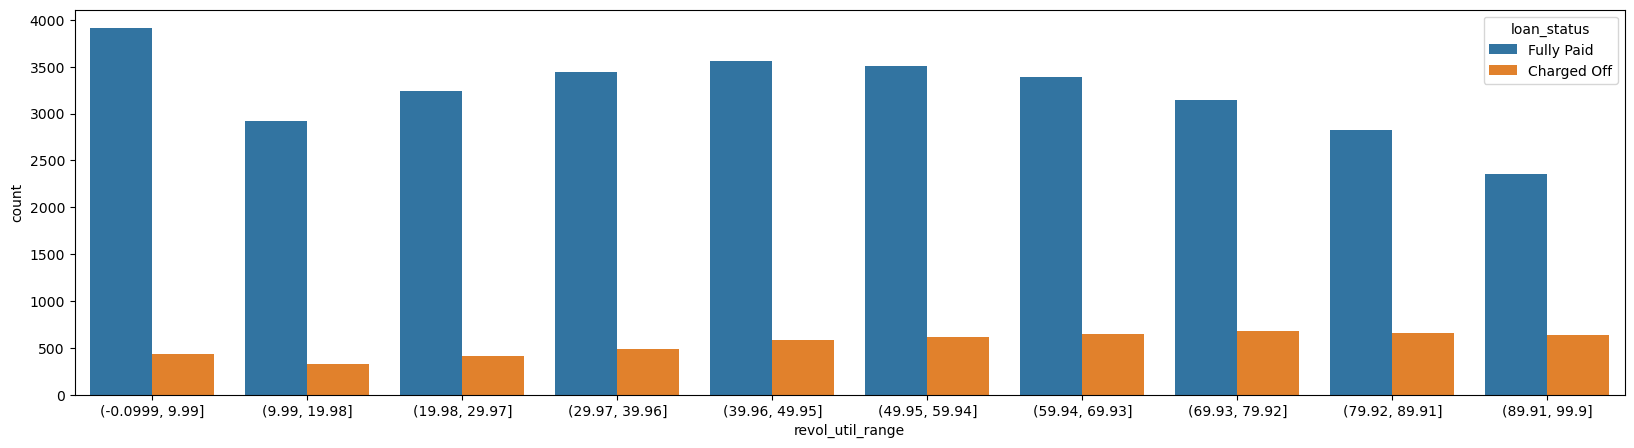

In [103]:
ldf['revol_util_range'] = pd.cut(ldf['revol_util'], bins=10)
plt.figure(figsize=(20,5))
sns.countplot(x ='revol_util_range', data=ldf, hue=ldf.loan_status)
plt.show()

# Multivariate Analysis

In [104]:
corr = ldf.corr(numeric_only=True)
high_positive_corr = corr[corr > 0.5]
high_positive_corr

##High positive correlation between loan amount and funded amount and total amount
## High positive correlation between recovery and collection recovery fee

negative_corr = corr[corr < 0]
negative_corr

##dti has negative correlation with annual income, with increase in annual income dti descreases and vice versa
##pub_rec_bankruptcies has negative correlation with annual income

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,emp_length,annual_inc,dti,delinq_2yrs,...,recoveries,collection_recovery_fee,last_pymnt_amnt,pub_rec_bankruptcies,issue_year,issue_month,las_payment_year,las_payment_month,earliest_cr_year,earliest_cr_month
loan_amnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.036734,...,NaN,NaN,NaN,-0.031786,NaN,NaN,NaN,-0.005632,-0.160820,-0.012997
funded_amnt,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.036550,...,NaN,NaN,NaN,-0.032805,NaN,NaN,NaN,-0.008753,-0.154073,-0.012247
funded_amnt_inv,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.043344,...,NaN,NaN,NaN,-0.033295,NaN,NaN,NaN,-0.000650,-0.138641,-0.011395
term,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.018326,-0.035471,-0.016599
int_rate,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.006796,NaN,-0.009258
installment,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.024712,...,NaN,NaN,NaN,-0.029324,NaN,NaN,NaN,-0.003198,-0.140249,-0.008881
emp_length,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.244741,-0.041342
annual_inc,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.099862,NaN,...,NaN,NaN,NaN,-0.015344,NaN,NaN,NaN,-0.005722,-0.254265,-0.017289
dti,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.099862,NaN,-0.031362,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,-0.038461,NaN
delinq_2yrs,-0.036734,-0.036550,-0.043344,NaN,NaN,-0.024712,NaN,NaN,-0.031362,NaN,...,NaN,NaN,-0.017071,NaN,-0.004154,-0.011309,-0.009353,NaN,-0.062579,NaN


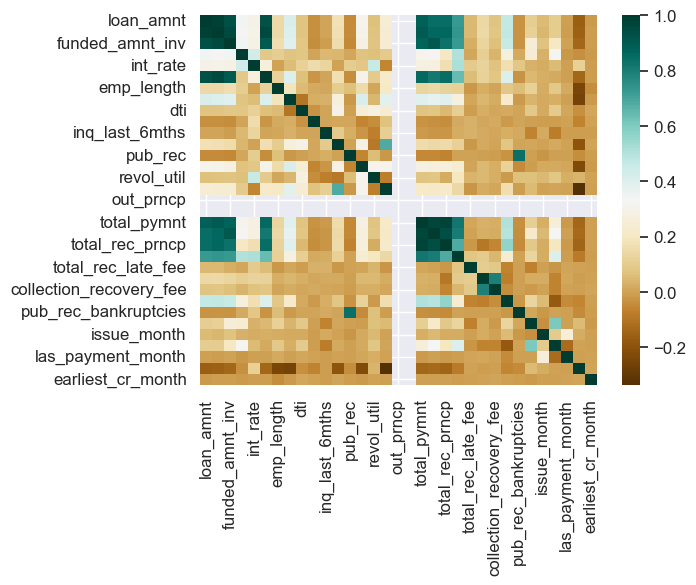

In [105]:
##Lets see the overral, correlation of all numeric variables using cluster map
sns.set(font_scale=1.1)
sns.heatmap(corr,cmap="BrBG")
plt.show()

In [111]:
#Multivariate analysis with 3 variables

pivot = ldf.pivot_table(index='loan_status', values = 'loan_amnt', columns = ['annual_inc_cat','emp_length'])

pivot

annual_inc_cat          High                                            \
emp_length                0             1             2             3    
loan_status                                                              
Charged Off     15949.642857  16762.068966  17059.375000  17844.921875   
Fully Paid      13227.244582  13988.888889  13482.653061  13750.752508   

annual_inc_cat                                                          \
emp_length                4             5             6             7    
loan_status                                                              
Charged Off     16479.276316  16080.063291  18576.754386  15795.454545   
Fully Paid      13590.668740  13986.106033  14445.176630  14107.200647   

annual_inc_cat                              ...     Very Low               \
emp_length                8             9   ...           1            2    
loan_status                                 ...                             
Charged Off     17084.210526  16425.000000  ...  7465.119760  6918.750000   
Fully Paid      14634.375000  14686.015326  ...  6417.410714  6326.982161   

annual_inc_cat                                                      \
emp_length               3            4            5            6    
loan_status                                                          
Charged Off     7044.565217  6570.719844  7755.630631  8837.337662   
Fully Paid      6653.446191  6649.448706  7028.389831  7236.404639   

annual_inc_cat                                                      
emp_length               7            8            9            10  
loan_status                                                         
Charged Off     9519.230769  8274.444444  9080.000000  8579.189189  
Fully Paid      7347.052846  7596.859903  7302.364865  7689.435146  

[2 rows x 55 columns]

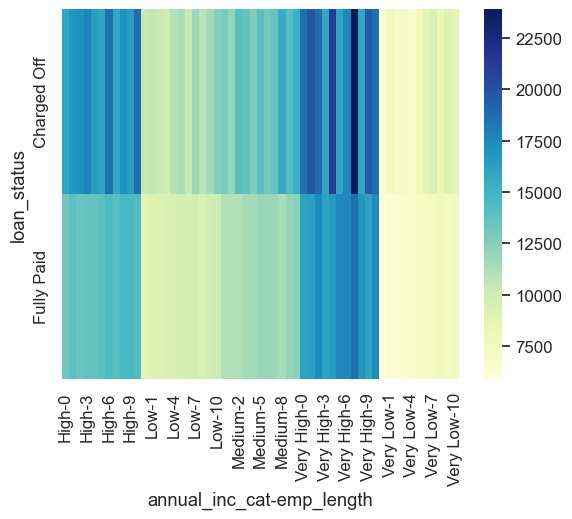

In [112]:
#Plot heatmap for the above pivot
sns.heatmap(pivot, cmap="YlGnBu",fmt="0.0f")
plt.show()

#For Very High(>95 percentile) and High income (75-95)% average loan amount charged off is highest.

In [113]:
##Analyse loand amount and loan status wrt grade
pivot_grade = ldf.pivot_table(index='loan_status', values = 'loan_amnt', columns = 'grade')

pivot_grade

grade,A,B,C,D,E,F,G
loan_status,,,,,,,
Charged Off,7847.222222,10826.634339,11005.007616,12215.827996,15817.416546,19161.147541,16716.666667
Fully Paid,8600.906166,10810.229982,10625.047207,11929.798762,15322.294430,17132.961783,20087.824675


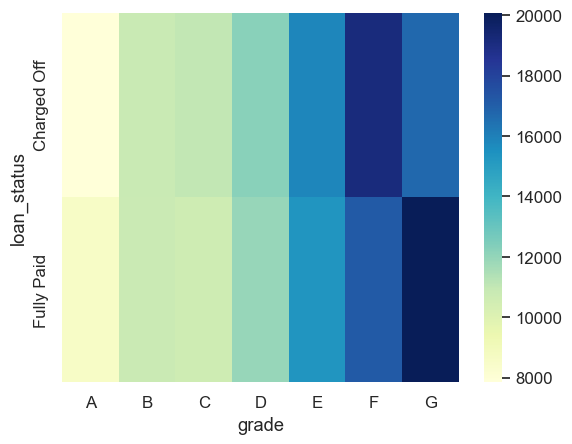

In [114]:
sns.heatmap(pivot_grade, cmap="YlGnBu",fmt="0.0f")
plt.show()

#Average loan amount charged off is highest for grade F loans

In [115]:
ldf['int_rate_range'] = pd.cut(ldf['int_rate'], bins=5)
pivot_interest_rate = ldf.pivot_table(index='loan_status', values = 'loan_amnt', columns = ['int_rate_range','term'])
pivot_interest_rate

int_rate_range (5.403, 8.832]               (8.832, 12.244]                \
term                       36            60              36            60   
loan_status                                                                 
Charged Off       7633.704883   9286.206897     8992.867435  13470.935961   
Fully Paid        8463.230894  10121.187683     9784.427533  14090.081828   

int_rate_range (12.244, 15.656]               (15.656, 19.068]                \
term                         36            60               36            60   
loan_status                                                                    
Charged Off         9519.940978  14484.144543     11075.644330  15939.531435   
Fully Paid          9685.702782  14747.233748     11755.952381  15891.129844   

int_rate_range (19.068, 22.48]                
term                        36            60  
loan_status                                   
Charged Off       13711.170213  19792.213115  
Fully Paid        13671.581197  20492.827869

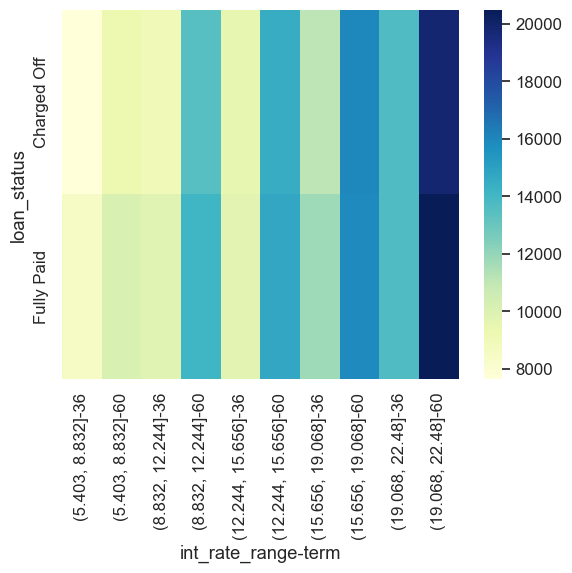

In [116]:
#Plot heatmap for the above pivot
sns.heatmap(pivot_interest_rate, cmap="YlGnBu",fmt="0.0f")
plt.show()

##Charged off loan amount is highest for interest rate between (19-22) and term for 5 years.Higher the interest rate and term higher are the chances of defaulting

In [117]:
pivot_purpose = ldf.pivot_table(index='loan_status', values = 'loan_amnt', columns = ['purpose','home_ownership'])
pivot_purpose

purpose                 car                                      credit_card  \
home_ownership     MORTGAGE    OTHER          OWN         RENT      MORTGAGE   
loan_status                                                                    
Charged Off     7046.428571  10000.0  6778.333333  7569.178082  14729.185022   
Fully Paid      6837.153846   4000.0  6956.578947  6276.437848  12536.400312   

purpose                                                  debt_consolidation  \
home_ownership         OTHER           OWN          RENT           MORTGAGE   
loan_status                                                                   
Charged Off     11900.000000  11923.648649  11446.590909       15286.001789   
Fully Paid       8716.666667  10392.741935  10281.404217       13778.810258   

purpose                  ... small_business                              \
home_ownership     NONE  ...          OTHER           OWN          RENT   
loan_status              ...                                              
Charged Off         NaN  ...   16000.000000  13291.176471  12355.607477   
Fully Paid      10000.0  ...   13283.333333  10660.447761  11183.789062   

purpose            vacation                                 wedding          \
home_ownership     MORTGAGE          OWN         RENT      MORTGAGE   OTHER   
loan_status                                                                   
Charged Off     7317.307692  3600.000000  5608.333333  11490.625000     NaN   
Fully Paid      5838.223140  5292.307692  5006.571429  10403.466387  5000.0   

purpose                               
home_ownership     OWN          RENT  
loan_status                           
Charged Off     5000.0  11229.245283  
Fully Paid      9204.0   9157.604563  

[2 rows x 56 columns]

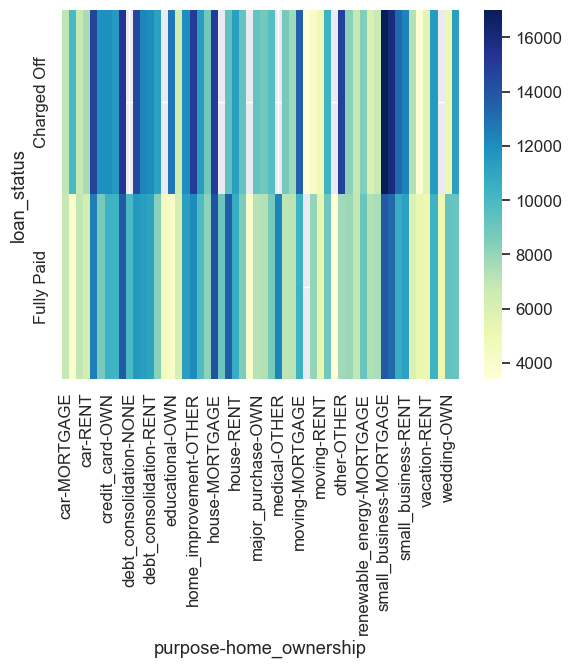

In [118]:
#Plot heatmap for the above pivot
sns.heatmap(pivot_purpose, cmap="YlGnBu",fmt="0.0f")
plt.show()

##Highest average charged off loan is for purpose as 'small_business' and its even higher when the person has Mortgage home
##Defaulters are much lesser(nearly zero) when purpose is education and has own house.

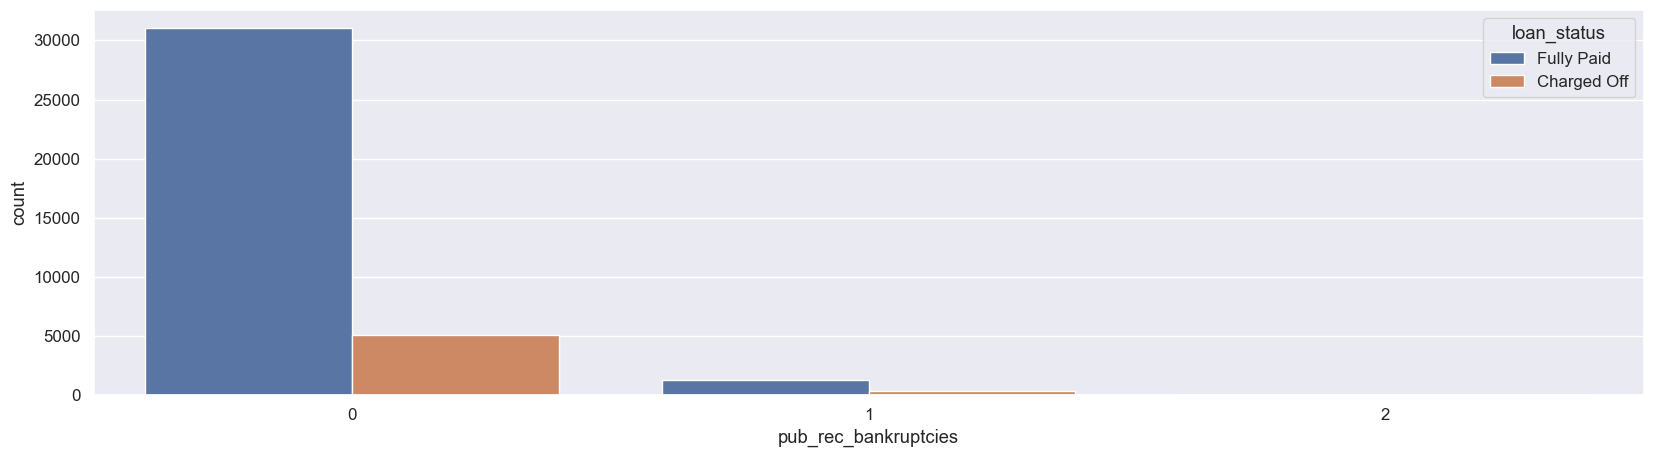

In [119]:
# Analysing distribution of pub_rec_bankruptcies
plt.figure(figsize=(20,5))
sns.countplot(data=ldf,x='pub_rec_bankruptcies',hue='loan_status')
plt.show()

# Conclusions

The key factors identified to make decision for loan approval could be:

- Annual Income
- Grades
- Verification Status
- Public record bankruptcies
- Delinq 2 yrs
- DTI
- Credit line history


# Recommendations

- A few considerations to avoid or minimize charged off accounts:

- Loan amount higher than 30K at an interest rate equal or above 15% is a high risk account and hence must be thoroughly investigated before taking a decision.

- For a loan amount of more than 30K, an annual income of the borrower must be equal of greater than 70K.

- To avoid defaults, the debt to income ratio of the borrower must be less than 30

- Home ownership must be checked and verified. Mortgage and rent is one of the risk factor.

- Loans falling under grades E,F,G are seen to have a high risk associated. For grade G, people with annual income less than equal to 70K and interest rate more than 20% tend to default. Hence at high risk. 

- An employment length is 10+ yrs and loan amount of 12k-14k is a high risk account.

- A loan amount of more than 15K taken for a purpose of small business is at high risk.

- Borrower having more than 1 public recorded bankruptcies and delinq count is at high risk.

- Borrower having a high amount of outstanding balance in his revolving accounts is at a high risk.

- A high amount loan in metro cities is at less risk compared to tier 2 or tier 3 cities.
